<a href="https://colab.research.google.com/github/ronsperber/Real-Estate-Pricing/blob/main/realestateprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from plotnine import *

In [2]:
test=pd.read_csv("https://raw.githubusercontent.com/ronsperber/Real-Estate-Pricing/main/test.csv")
train=pd.read_csv("https://raw.githubusercontent.com/ronsperber/Real-Estate-Pricing/main/train.csv")

In [3]:
test.shape

(1459, 80)

In [4]:
train.shape

(1460, 81)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
test.Alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [8]:
test[test.Alley.isna()].shape

(1352, 80)

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
missing_train = pd.concat([train.isnull().sum(), 100 * train.isnull().mean()], axis=1)
missing_train.columns=['count','%']
missing_train[missing_train["count"]>0].sort_values(by='count')

,count,%
Electrical,1,0.068493
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageCond,81,5.547945
GarageQual,81,5.547945


In [12]:
missing_test = pd.concat([test.isnull().sum(), 100 * test.isnull().mean()], axis=1)
missing_test.columns=['count','%']
missing_test[missing_test["count"]>0].sort_values(by='count')

,count,%
TotalBsmtSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
BsmtUnfSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior1st,1,0.068540
Exterior2nd,1,0.068540


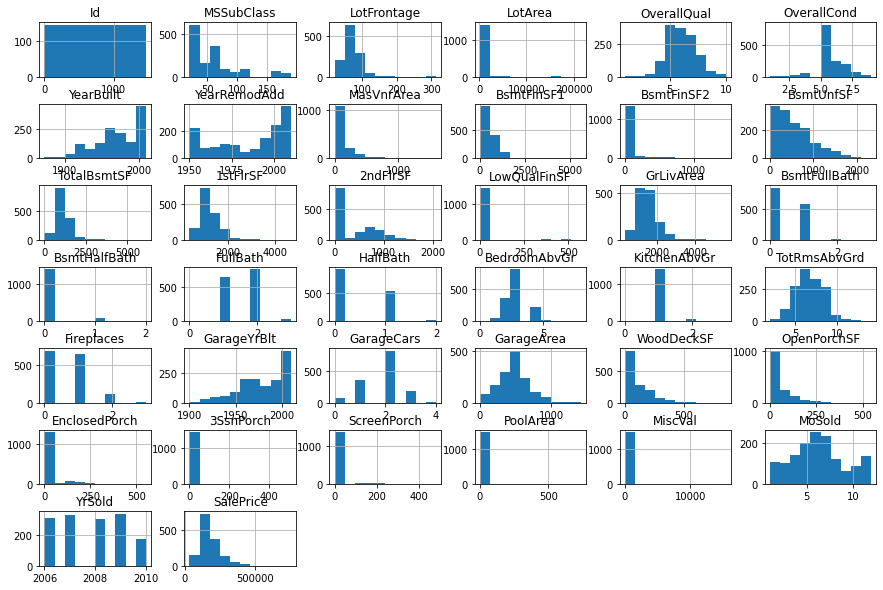

In [13]:
#View distribution of the features
train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [14]:
train[train.GarageArea>1000].GarageArea

178     1166
270     1053
317     1025
581     1390
664     1134
803     1020
825     1220
1061    1248
1087    1043
1142    1052
1190    1356
1228    1052
1268    1014
1298    1418
1417    1069
Name: GarageArea, dtype: int64

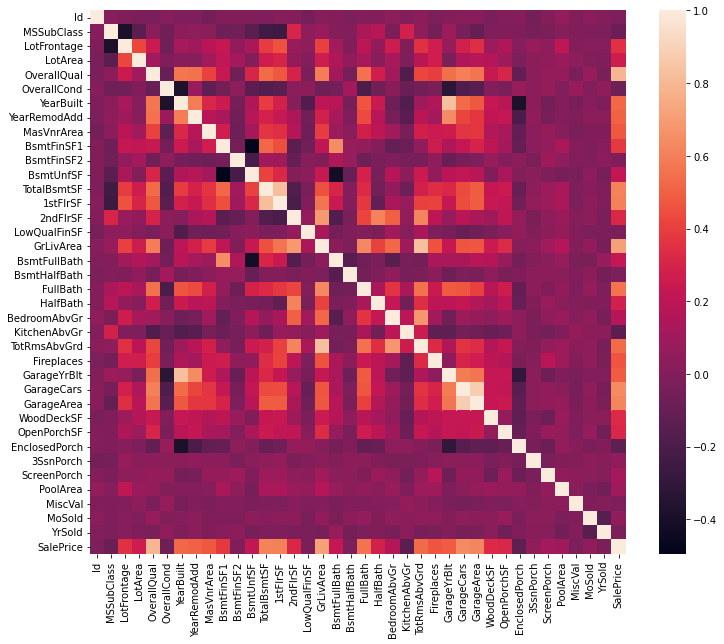

In [15]:
plt.subplots(figsize=(12,10))
sns.heatmap(train.corr());

In [16]:
def scatterplots(dataframe,columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=dataframe, alpha=0.5)
        ax.set(xlabel=col, ylabel='Sale Price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

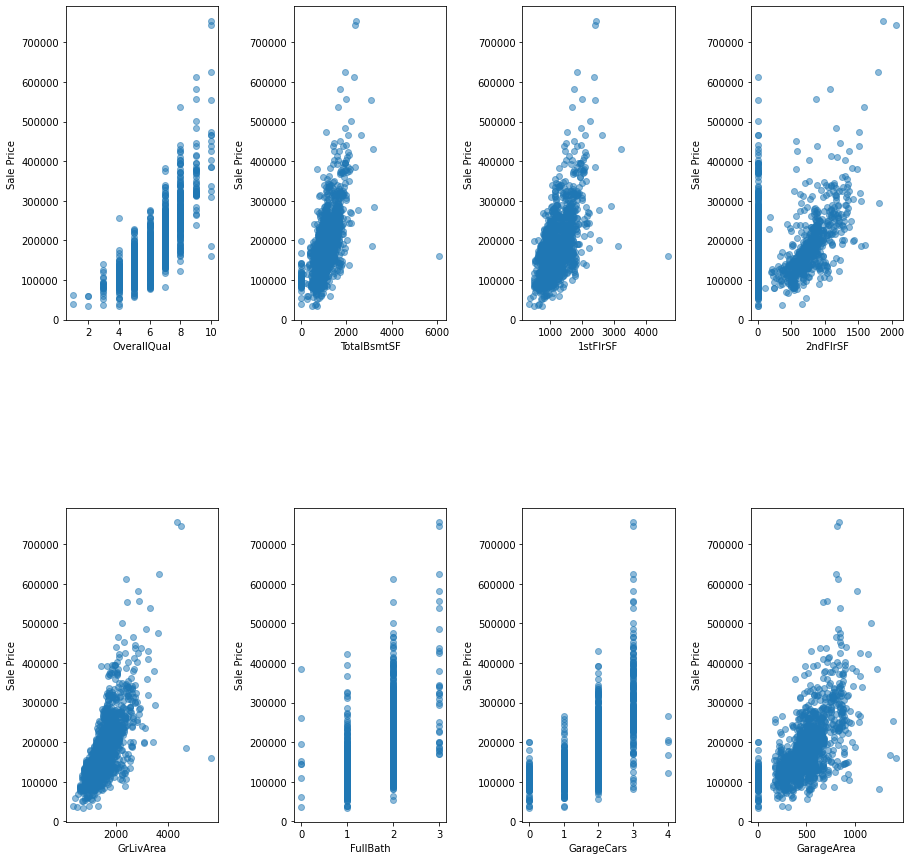

In [17]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(train,features, ncol=4, figsize=(15, 15))

In [18]:
train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [19]:
train[train.PoolQC.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [20]:
train[train.PoolQC.notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,...,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,...,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,...,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,...,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,...,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,...,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [21]:
nopool=train[train.PoolQC.isna()]

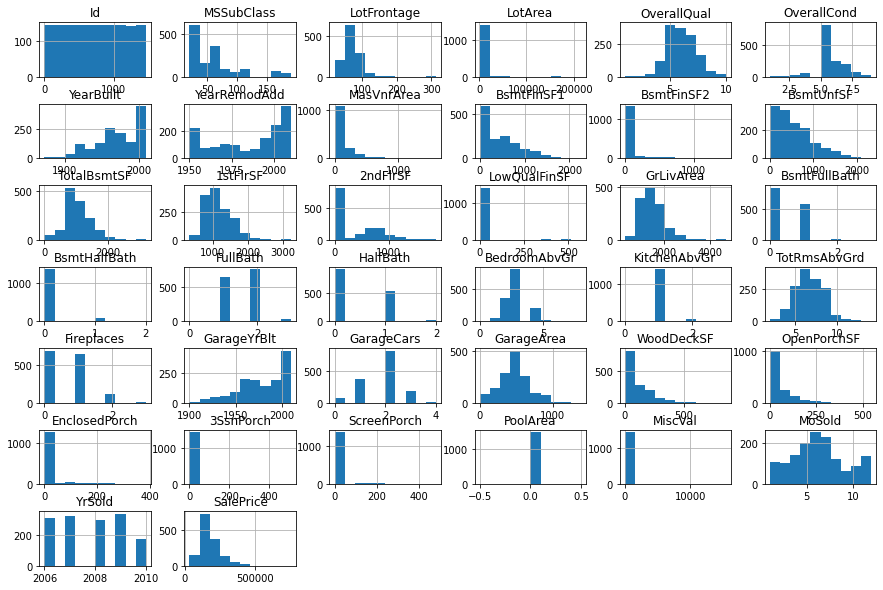

In [22]:
#View distribution of the features
nopool.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

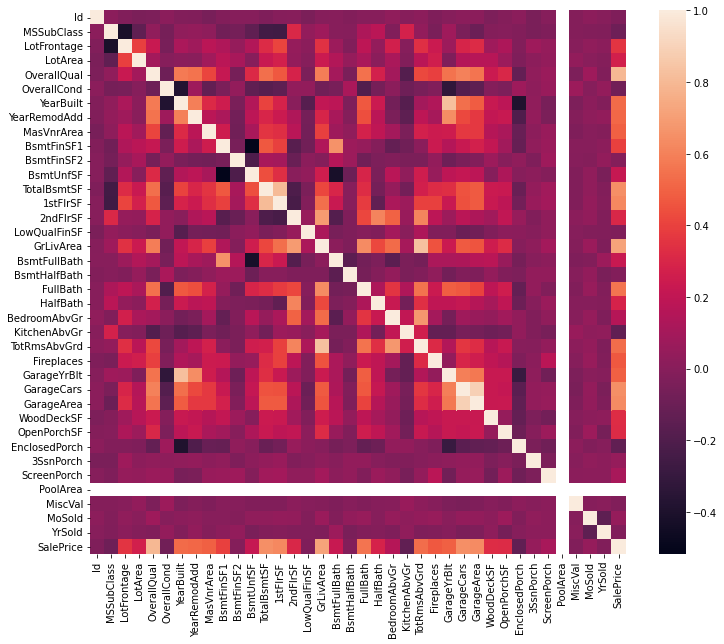

In [23]:
plt.subplots(figsize=(12,10))
sns.heatmap(nopool.corr());

In [24]:
pool=train[train.PoolQC.notnull()]

In [25]:
pool.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1067.571429,62.142857,146.833333,23047.285714,7.571429,5.428571,1973.857143,1987.714286,154.142857,1535.857143,147.142857,330.000000,2013.000000,1979.571429,913.285714,56.000000,2948.857143,1.00000,0.142857,2.000000,0.571429,3.714286,1.0,8.714286,1.571429,1973.857143,2.00000,694.857143,205.571429,104.857143,78.857143,0.0,62.857143,575.428571,285.714286,4.857143,2006.714286,288138.571429
std,433.712600,20.788046,92.460622,18798.332246,1.812654,0.975900,28.474717,14.682351,291.819824,1921.171555,201.820406,257.368089,1882.534727,1266.764758,764.551004,148.162073,1645.166499,0.57735,0.377964,0.816497,0.534522,0.755929,0.0,2.751623,0.786796,28.474717,0.57735,363.105324,197.505154,117.529328,208.636389,0.0,166.304368,89.840335,755.928946,3.078342,0.951190,206071.850935
min,198.000000,20.000000,76.000000,9880.000000,6.000000,4.000000,1918.000000,1966.000000,0.000000,0.000000,0.000000,0.000000,697.000000,1118.000000,0.000000,0.000000,1118.000000,0.00000,0.000000,1.000000,0.000000,3.000000,1.0,5.000000,1.000000,1918.000000,1.00000,358.000000,0.000000,0.000000,0.000000,0.0,0.000000,480.000000,0.000000,1.000000,2006.000000,160000.000000
25%,991.000000,60.000000,78.500000,12881.500000,6.000000,5.000000,1970.000000,1977.500000,0.000000,592.500000,0.000000,136.500000,1068.000000,1334.500000,313.000000,0.000000,1755.000000,1.00000,0.000000,1.500000,0.000000,3.000000,1.0,7.000000,1.000000,1970.000000,2.00000,458.000000,85.500000,8.000000,0.000000,0.0,0.000000,515.500000,0.000000,2.000000,2006.000000,176000.000000
50%,1183.000000,60.000000,120.000000,16692.000000,7.000000,5.000000,1977.000000,1990.000000,0.000000,790.000000,0.000000,300.000000,1360.000000,1392.000000,950.000000,0.000000,2784.000000,1.00000,0.000000,2.000000,1.000000,4.000000,1.0,8.000000,1.000000,1977.000000,2.00000,564.000000,203.000000,78.000000,0.000000,0.0,0.000000,555.000000,0.000000,7.000000,2006.000000,235000.000000
75%,1343.000000,77.500000,170.500000,22554.500000,9.000000,6.000000,1987.000000,1997.500000,141.500000,1566.000000,280.500000,520.000000,1894.000000,1993.000000,1376.000000,0.000000,3794.000000,1.00000,0.000000,2.500000,1.000000,4.000000,1.0,11.000000,2.000000,1987.000000,2.00000,804.000000,239.500000,174.000000,0.000000,0.0,0.000000,612.000000,0.000000,7.000000,2007.500000,262485.000000
max,1424.000000,80.000000,313.000000,63887.000000,10.000000,7.000000,2008.000000,2008.000000,796.000000,5644.000000,469.000000,697.000000,6110.000000,4692.000000,2065.000000,392.000000,5642.000000,2.00000,1.000000,3.000000,1.000000,5.000000,1.0,12.000000,3.000000,2008.000000,3.00000,1418.000000,586.000000,292.000000,552.000000,0.0,440.000000,738.000000,2000.000000,8.000000,2008.000000,745000.000000


There are only 7 entries in the data with a pool. That would not be enough to split the data into houses with a pool and those without. One thing to do is to see if any model has larger error in its predictions for the houses with a pool. If the errors there are significantly larger, that needs to be taken into account

In [26]:
train[train.LotFrontage>250]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,...,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [27]:
train[(train.LotFrontage>150) & (train.LotFrontage<250)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,...,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
231,232,60,RL,174.0,15138,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,506.0,Gd,TA,PConc,Gd,TA,No,GLQ,689,Unf,0,773,1462,GasA,...,Y,SBrkr,1490,1304,0,2794,1,0,2,1,4,1,Ex,9,Typ,1,TA,Attchd,1995.0,Fin,3,810,TA,TA,Y,0,146,202,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,403000
1107,1108,60,RL,168.0,23257,Pave,NaN,IR3,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,868,868,GasA,...,Y,SBrkr,887,1134,0,2021,0,0,2,1,3,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,RFn,2,422,TA,TA,Y,0,100,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,274725
1127,1128,20,RL,182.0,14572,Pave,NaN,IR3,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300,Unf,0,230,1530,GasA,...,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,3,630,TA,TA,Y,144,36,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Family,259000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,...,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1211,1212,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Gilbert,Norm,Norm,1Fam,1.5Fin,8,7,1988,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,427,Unf,0,132,559,GasA,...,Y,SBrkr,1080,672,0,1752,0,0,2,0,4,1,TA,8,Typ,0,NaN,Basment,1988.0,RFn,2,492,TA,TA,Y,325,12,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,Corner,Mod,OldTown,Feedr,Norm,1Fam,1Story,4,4,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,693,693,Grav,...,N,FuseA,693,0,0,693,0,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,20,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500


In [28]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [29]:
train[train.Fence.notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,...,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,...,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,...,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,...,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,...,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
1438,1439,20,RM,90.0,7407,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,...,Y,FuseA,1236,0,0,1236,1,0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1957.0,Unf,2,923,TA,TA,Y,0,158,158,0,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,149700
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,4,7,1910,2000,Gable,CompShg,MetalSd,HdBoard,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,560,560,GasA,...,N,SBrkr,796,550,0,1346,0,0,1,1,2,1,TA,6,Min2,0,NaN,Detchd,1950.0,Unf,1,384,Fa,TA,Y,168,24,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,Ga

In [30]:
fencetrain=train[train.Fence.notnull()]
nofencetrain=train[train.Fence.isna()]

In [31]:
fencetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,281.000000,281.000000,228.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,265.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,724.740214,47.900356,71.741228,9565.103203,5.562278,5.964413,1957.181495,1977.932384,65.359431,430.754448,86.914591,432.743772,950.412811,1099.124555,288.665480,10.501779,1398.291815,0.455516,0.071174,1.323843,0.306050,2.914591,1.021352,6.295374,0.558719,1966.298113,1.498221,410.423488,103.487544,38.476868,30.715302,3.857651,15.985765,12.626335,72.064057,6.338078,2007.925267,152912.007117
std,438.140258,33.790912,19.585319,3172.118328,1.037098,1.264409,24.055868,18.550290,126.956189,360.745409,208.330009,337.027996,323.933867,325.641765,408.585935,66.677375,536.414998,0.513023,0.257575,0.512453,0.476894,0.706981,0.167672,1.459555,0.674222,20.155217,0.660760,183.767328,145.520988,69.699511,73.596565,28.034310,62.823333,86.417917,297.207256,2.785731,1.332868,62113.736323
min,6.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,526.000000,0.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,308.000000,20.000000,60.000000,7804.000000,5.000000,5.000000,1945.000000,1964.000000,0.000000,0.000000,0.000000,169.000000,780.000000,888.000000,0.000000,0.000000,1040.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,123000.000000
50%,742.000000,50.000000,70.000000,9100.000000,5.000000,6.000000,1963.000000,1977.000000,0.000000,438.000000,0.000000,374.000000,918.000000,1056.000000,0.000000,0.000000,1252.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1967.000000,2.000000,440.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,141500.000000
75%,1120.000000,60.000000,80.000000,10594.000000,6.000000,7.000000,1974.000000,1995.000000,90.000000,663.000000,0.000000,672.000000,1092.000000,1236.000000,651.000000,0.000000,1661.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1979.000000,2.000000,525.000000,192.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,166000.000000
max,1458.000000,190.000000,174.000000,25419.000000,10.000000,9.000000,2004.000000,2009.000000,1047.000000,2096.000000,1474.000000,1436.000000,2524.000000,2524.000000,2065.000000,572.000000,4476.000000,2.000000,1.000000,3.000000,2.000000,5.000000,3.000000,12.000000,3.000000,2005.000000,4.000000,1014.000000,728.000000,547.000000,552.000000,320.000000,480.000000,738.000000,2500.000000,12.000000,2010.000000,745000.000000


In [32]:
nofencetrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1179.000000,1179.000000,973.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1171.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1114.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,731.872774,59.041561,69.653649,10743.659881,6.227311,5.482612,1974.625106,1986.518236,112.882152,446.710772,36.928753,599.296014,1082.935539,1177.761662,360.893978,4.734521,1543.390161,0.418151,0.054283,1.622561,0.401187,2.854962,1.052587,6.570823,0.625954,1981.410233,1.831213,487.889737,92.041561,48.610687,19.865988,3.302799,14.840543,0.407125,36.678541,6.318066,2007.789652,187596.837998
std,417.753586,43.827558,25.252231,10987.768403,1.424107,1.053087,30.555751,20.782534,190.694165,476.094891,146.404329,457.687868,458.309549,398.375884,441.958008,43.185763,519.180687,0.520261,0.234042,0.544333,0.507364,0.839495,0.230780,1.658654,0.637033,24.787860,0.752704,217.793179,119.994019,65.288041,57.589163,29.625433,53.964052,13.979265,532.555017,2.684883,1.326187,81656.497075
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,373.500000,20.000000,58.000000,7417.500000,5.000000,5.000000,1955.000000,1969.000000,0.000000,0.000000,0.000000,248.000000,800.000000,879.500000,0.000000,0.000000,1193.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.250000,1.000000,366.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132750.000000
50%,728.000000,60.000000,68.000000,9550.000000,6.000000,5.000000,1978.000000,1996.000000,0.000000,370.000000,0.000000,506.000000,1008.000000,1096.000000,0.000000,0.000000,1494.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1990.000000,2.000000,484.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,173000.000000
75%,1091.500000,70.000000,80.000000,11840.000000,7.000000,6.000000,2003.000000,2005.000000,178.000000,728.000000,0.000000,847.000000,1363.000000,1438.500000,744.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,600.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,224700.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,1872.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,502.000000,386.000000,508.000000,396.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


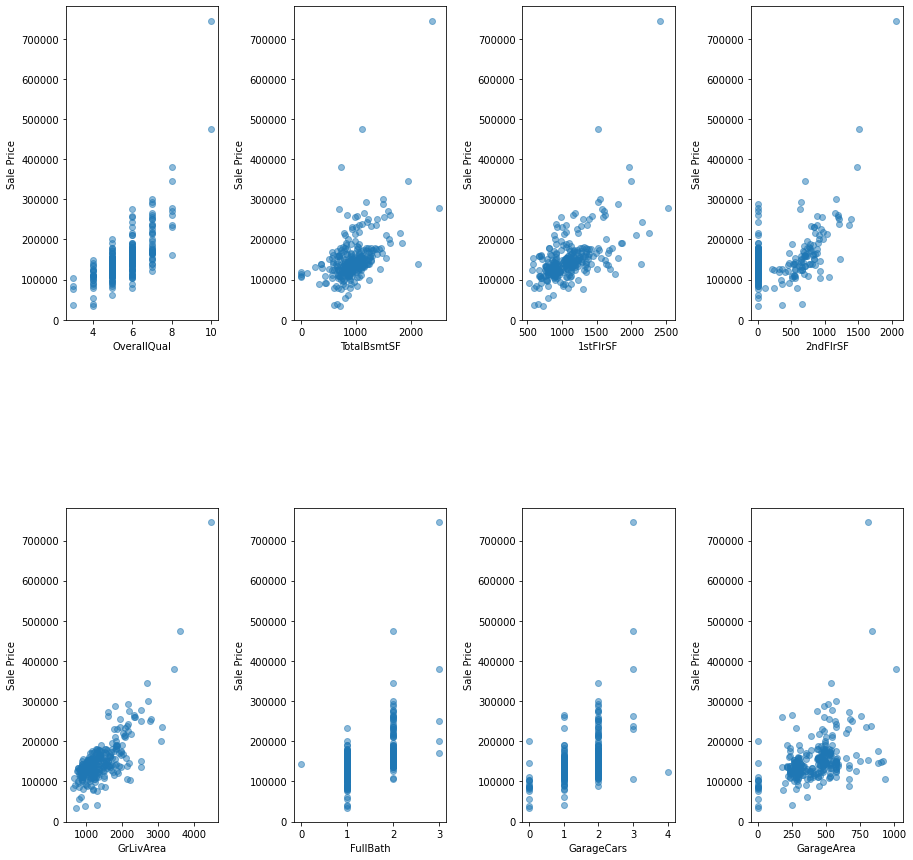

In [33]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(fencetrain,features, ncol=4, figsize=(15, 15))

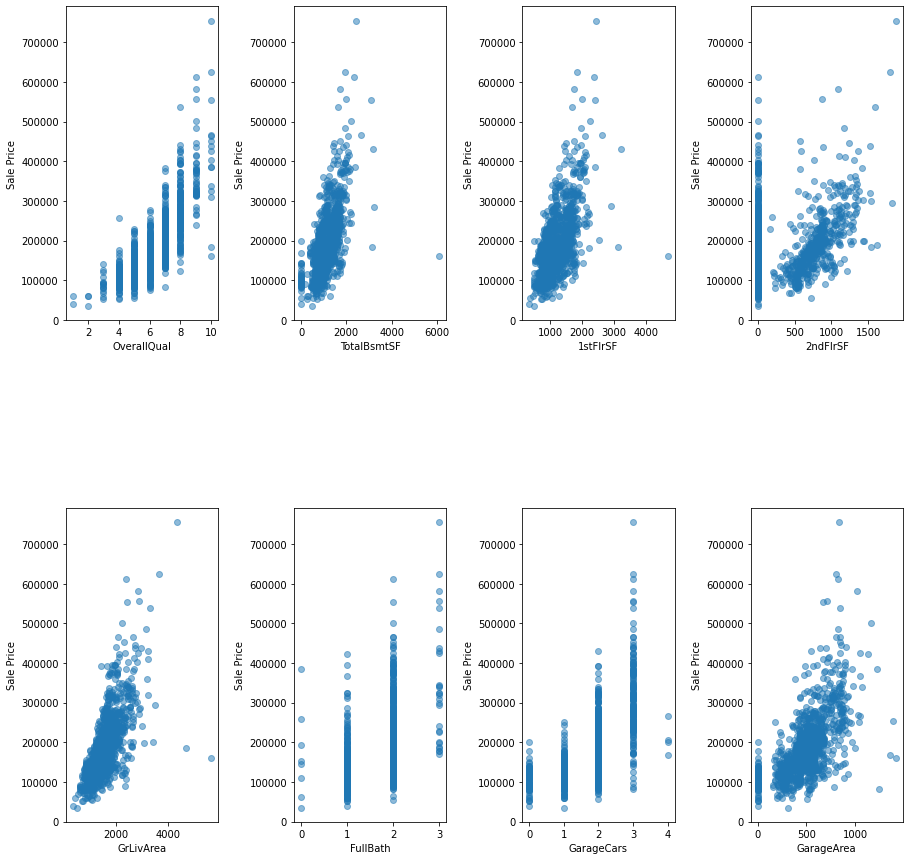

In [34]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(nofencetrain,features, ncol=4, figsize=(15, 15))

There are a significant number of houses with a fence. There is a gap in sale price between houses with no fence and houses with a fence. It may be worth developing separate models for each. We could potentially model them as a whole and see if the errors in houses with a fence have a noticeable pattern or just split them into two groups and then use the models separately to predict a price for the test data by splitting the test data into separate groups as well

In [35]:
garagetrain=train[train.GarageCars>0]

In [36]:
train.GarageCars=train.GarageCars.dropna(0)

In [37]:
nogaragetrain=train[train.GarageCars==0]

In [38]:
garagetrain.shape

(1379, 81)

In [39]:
nogaragetrain.shape

(81, 81)

Only 81 homes had no garage. This is too small to sample separately

In [40]:
train.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [41]:
train[train.Alley.notnull()].shape

(91, 81)

Only 91 homes had an alley accessible. This is too small to sample separately

In [42]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [43]:
train.EnclosedPorch.unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99])

In [44]:
train['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304])

In [45]:
train['ScreenPorch'].unique()

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40])

In [46]:
#Create column with total porcharea combining all types of porch in the data
train['TotalPorch']=train['3SsnPorch']+train['ScreenPorch']+train['EnclosedPorch']

In [47]:
train.TotalPorch.unique()

array([  0, 272, 320, 228, 205, 176,  87, 172, 198, 102, 407,  37, 144,
        64, 114, 291, 202, 128, 252, 156,  44,  99,  77, 184, 168, 192,
       130, 140, 180, 183, 142,  39,  40, 410, 224, 266, 552,  30, 170,
       126, 508, 154,  96,  60, 150, 120, 238, 112, 153, 245, 196,  52,
       259, 160, 271, 234, 244, 268, 137,  24, 108, 294, 374, 177, 218,
       185, 182,  90, 242,  91, 396, 169, 105,  34, 248, 236, 276,  32,
        80, 115, 161, 116, 158, 145, 210,  36, 200,  84, 148, 122,  95,
       136, 240, 174, 189, 260, 100, 147, 385, 293, 164, 287, 216, 239,
        67,  56, 129,  98, 143, 386, 134, 197, 204, 264, 275, 225, 152,
       230, 254,  68, 194, 175, 312, 222, 265, 162, 322, 232, 190,  23,
       318, 233,  63,  48,  94, 138, 165, 226,  19, 220, 342, 214, 280,
       273, 288, 263, 330, 208, 163,  81, 123, 286, 480, 290,  20, 301,
       178, 221, 440, 212,  50, 155, 119, 304])

In [48]:
train[train.TotalPorch==0].shape

(1119, 82)

In [49]:
train[train.TotalPorch>0].shape

(341, 82)

In [50]:
porchtrain=train[train.TotalPorch>0]
noporchtrain=train[train.TotalPorch==0]

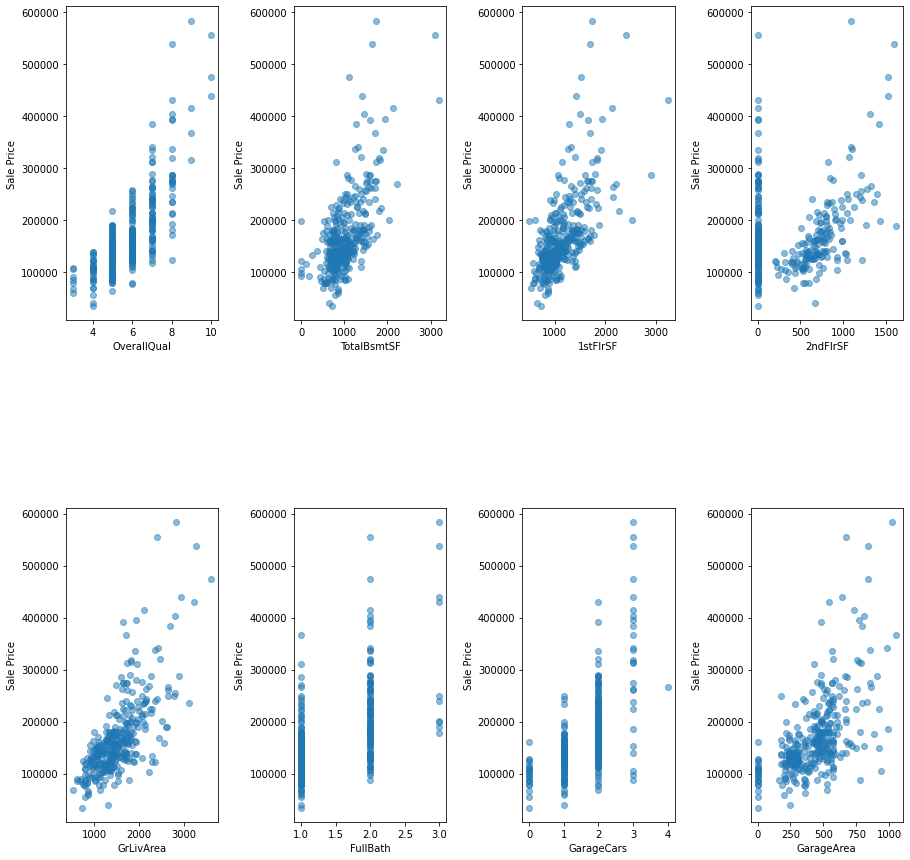

In [51]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(porchtrain,features, ncol=4, figsize=(15, 15))

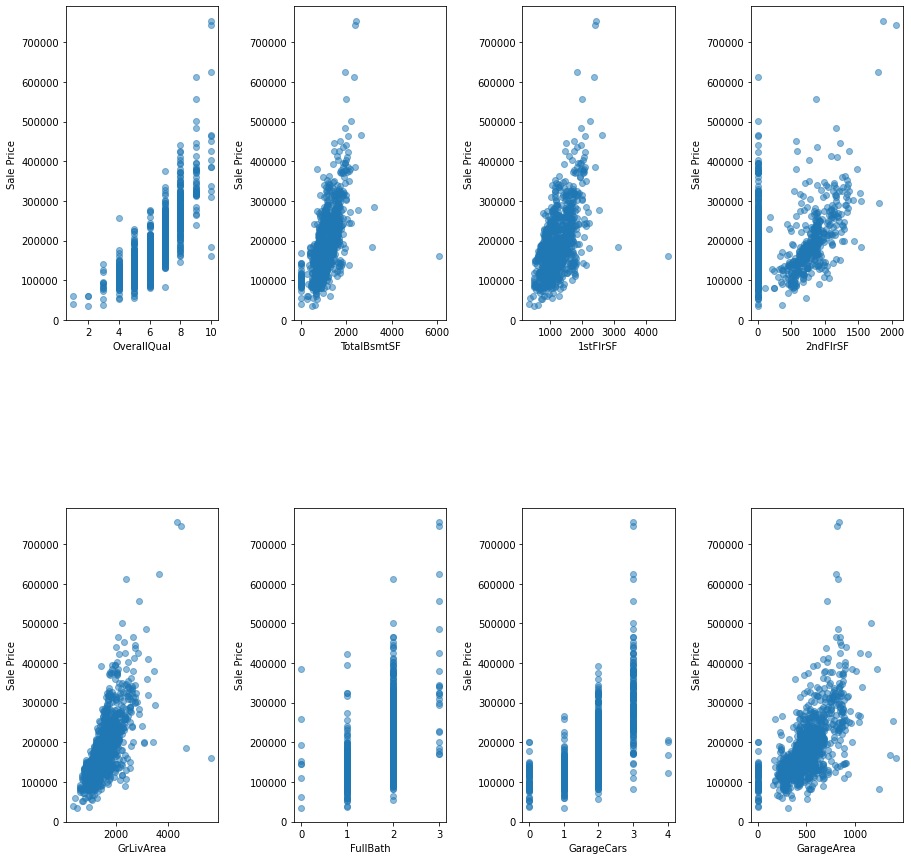

In [52]:
features=["OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","FullBath","GarageCars","GarageArea"]
scatterplots(noporchtrain,features, ncol=4, figsize=(15, 15))

In [53]:
porchtrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalPorch
count,341.000000,341.000000,285.000000,341.000000,341.000000,341.000000,341.000000,341.00000,340.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,319.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.00000,341.000000,341.000000,341.00000,341.000000,341.000000,341.000000,341.000000
mean,714.724340,52.873900,69.968421,10533.739003,5.859238,5.824047,1949.633431,1977.40176,81.655882,391.715543,64.255132,558.228739,1014.199413,1146.249267,372.266862,9.357771,1527.873900,0.384164,0.061584,1.436950,0.322581,2.879765,1.043988,6.498534,0.703812,1963.793103,1.586510,429.947214,55.812317,38.507331,93.997067,14.59824,64.483871,3.023460,63.98827,6.357771,2007.856305,169888.648094,173.079179
std,424.270516,36.144464,21.098421,5874.471775,1.242913,1.273535,31.289595,21.99398,173.678871,415.607944,190.782204,368.313981,401.100840,377.757819,429.464765,62.373504,507.875985,0.493113,0.240751,0.552786,0.486633,0.804528,0.219224,1.589718,0.696810,26.392320,0.737041,207.354336,105.895342,71.154290,96.115357,59.36730,100.719604,39.421844,497.76907,2.769770,1.312787,78319.391320,81.200095
min,4.000000,20.000000,30.000000,3182.000000,3.000000,2.000000,1872.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,495.000000,0.000000,0.000000,520.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,2006.000000,34900.000000,19.000000
25%,360.000000,20.000000,57.000000,7500.000000,5.000000,5.000000,1922.000000,1950.00000,0.000000,0.000000,0.000000,280.000000,764.000000,885.000000,0.000000,0.000000,1180.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1949.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,5.000000,2007.000000,122000.000000,119.000000
50%,682.000000,50.000000,65.000000,9600.000000,6.000000,6.000000,1953.000000,1978.00000,0.000000,315.000000,0.000000,572.000000,952.000000,1055.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1963.000000,2.000000,442.000000,0.000000,0.000000,91.000000,0.00000,0.000000,0.000000,0.00000,6.000000,2008.000000,153000.000000,168.000000
75%,1095.000000,70.000000,80.000000,11700.000000,7.000000,7.000000,1970.000000,1999.00000,108.000000,644.000000,0.000000,779.000000,1219.000000,1357.000000,716.000000,0.000000,1775.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1987.500000,2.000000,546.000000,72.000000,55.000000,164.000000,0.00000,144.000000,0.000000,0.00000,8.000000,2009.000000,194500.000000,216.000000
max,1459.000000,190.000000,174.000000,57200.000000,10.000000,9.000000,2008.000000,2009.00000,1600.000000,1767.000000,1120.000000,2121.000000,3200.000000,3228.000000,1611.000000,572.000000,3608.000000,2.000000,1.000000,3.000000,2.000000,5.000000,3.000000,12.000000,3.000000,2009.000000,4.000000,1052.000000,503.000000,547.000000,552.000000,508.00000,480.000000,519.000000,8300.00000,12.000000,2010.000000,582933.000000,552.000000


In [54]:
noporchtrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalPorch
count,1119.000000,1119.000000,916.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1112.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1060.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.0,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0
mean,735.307417,58.123324,70.075328,10511.674710,6.172475,5.499553,1977.860590,1987.140304,110.420863,459.462913,41.153709,569.986595,1070.603217,1167.617516,339.290438,4.773905,1511.681859,0.437891,0.056300,1.604111,0.401251,2.862377,1.047364,6.523682,0.585344,1982.933962,1.822163,486.093834,105.956211,49.144772,0.0,0.0,0.0,2.678284,37.242181,6.310992,2007.803396,184283.214477,0.0
std,420.868807,43.947226,25.204644,10932.403022,1.415387,1.047934,26.579079,19.671201,182.811893,466.768116,150.889235,462.072808,448.881807,389.267925,438.558552,43.557457,530.893269,0.526093,0.238235,0.544628,0.506521,0.819489,0.220768,1.636765,0.625630,22.343008,0.742048,214.108931,128.465426,64.518559,0.0,0.0,0.0,40.421772,495.674750,2.684311,1.333062,79512.278698,0.0
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,2006.000000,35311.000000,0.0
25%,371.500000,20.000000,60.000000,7581.000000,5.000000,5.000000,1960.000000,1970.000000,0.000000,0.000000,0.000000,205.500000,815.000000,882.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1966.000000,1.000000,360.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,5.000000,2007.000000,132000.000000,0.0
50%,743.000000,60.000000,70.000000,9382.000000,6.000000,5.000000,1978.000000,1996.000000,0.000000,408.000000,0.000000,441.000000,1002.000000,1097.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1989.000000,2.000000,484.000000,78.000000,32.000000,0.0,0.0,0.0,0.000000,0.000000,6.000000,2008.000000,168000.000000,0.0
75%,1095.000000,75.000000,80.000000,11513.000000,7.000000,6.000000,2003.000000,2004.000000,171.250000,738.500000,0.000000,840.000000,1315.000000,1416.500000,729.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,588.000000,183.000000,70.000000,0.0,0.0,0.0,0.000000,0.000000,8.000000,2009.000000,219355.000000,0.0
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,528.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,502.000000,0.0,0.0,0.0,738.000000,15500.000000,12.000000,2010.000000,755000.000000,0.0


There are a significant number of houses with a porch as a feature. As with the fence it could be worth investigating separately. We can't break up into too many  but it's possible that separating the houses by fencing and/or porches to see if it makes a large difference in the model.

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 259 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


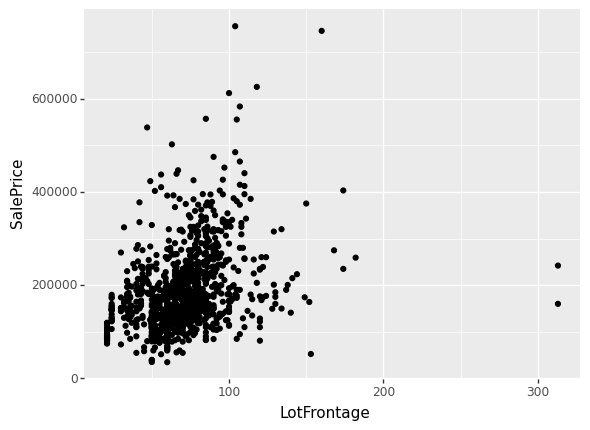

<ggplot: (8788144760361)>

In [55]:
ggplot(train, aes(x = 'LotFrontage', y = 'SalePrice')) + geom_point()

In [56]:
train[train.LotFrontage.isna()].shape

(259, 82)

In [57]:
train[train.LotFrontage.isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorch
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,228
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,...,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,176
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,...,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,176
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,...,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,0
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,...,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,0


In [58]:
fencetrain[fencetrain.LotFrontage.isna()].shape

(53, 81)

In [59]:
nofencetrain[nofencetrain.LotFrontage.isna()].shape

(206, 81)

In [60]:
train[train.LotArea.isna()].shape

(0, 82)

In [61]:
train.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [62]:
train.Fence=train.Fence.fillna(0)

In [63]:
train.Fence.head()

0    0
1    0
2    0
3    0
4    0
Name: Fence, dtype: object

In [64]:
train['fenced']=train.Fence.apply(lambda x : 'Not Fenced' if x==0 else 'Fenced')

In [65]:
train.fenced.head(20)

0     Not Fenced
1     Not Fenced
2     Not Fenced
3     Not Fenced
4     Not Fenced
5         Fenced
6     Not Fenced
7     Not Fenced
8     Not Fenced
9     Not Fenced
10    Not Fenced
11    Not Fenced
12    Not Fenced
13    Not Fenced
14        Fenced
15        Fenced
16    Not Fenced
17    Not Fenced
18    Not Fenced
19        Fenced
Name: fenced, dtype: object

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


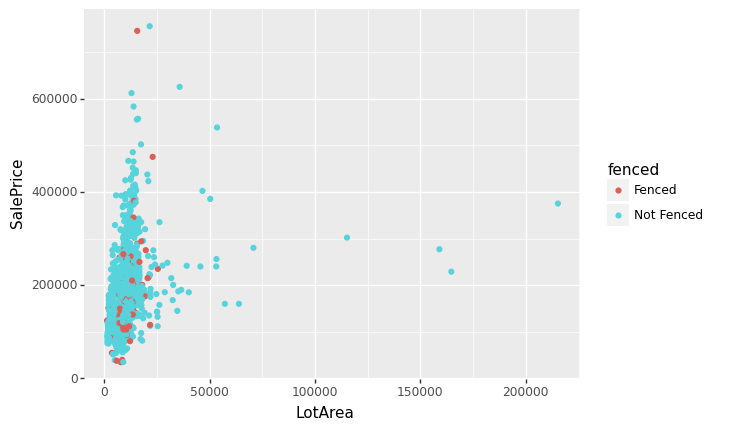

<ggplot: (8788144760329)>

In [66]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='fenced')) + geom_point()

In [67]:
train['hasporch']=train.TotalPorch.apply(lambda x: 'Porch' if x > 0 else 'No Porch')                     

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


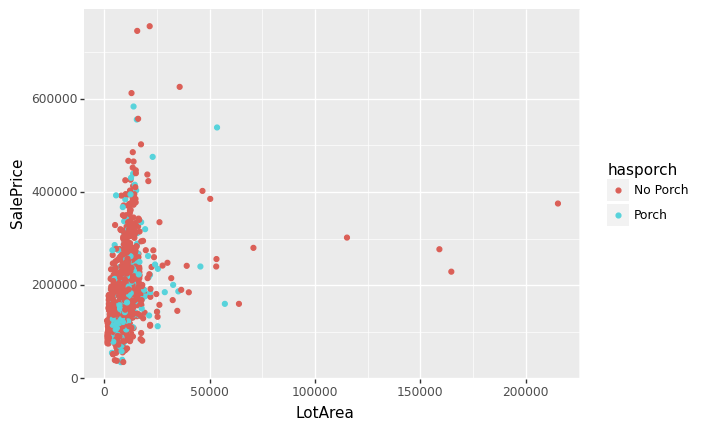

<ggplot: (8788156485409)>

In [68]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='hasporch')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


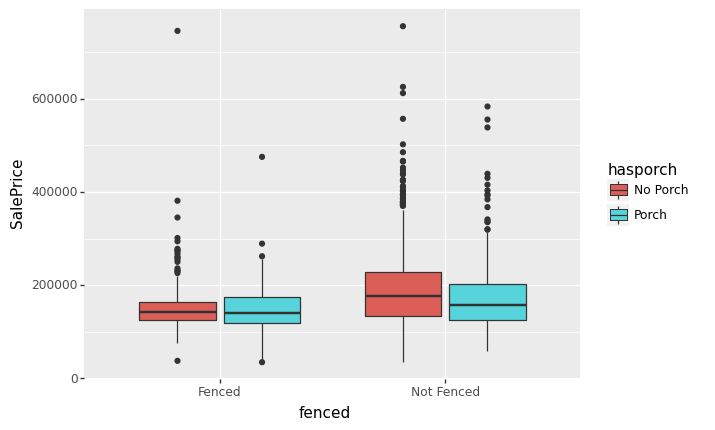

<ggplot: (8788157955181)>

In [69]:
ggplot(train, aes(x = 'fenced', y = 'SalePrice', fill = 'hasporch')) + geom_boxplot() 

It is hard to tell at this point what difference fences and porches make as categorical data. For fenced in yards the median was nearly identical for porch or no porch while porches had a slightly wider variation. Homes without neither a fence nor a porch had the highest median price but it doesn't appear enough to draw a conclusion that either feature makes a significant difference to the price alone. It might be worth looking to see if the other features that might affect price have a similar distribution.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


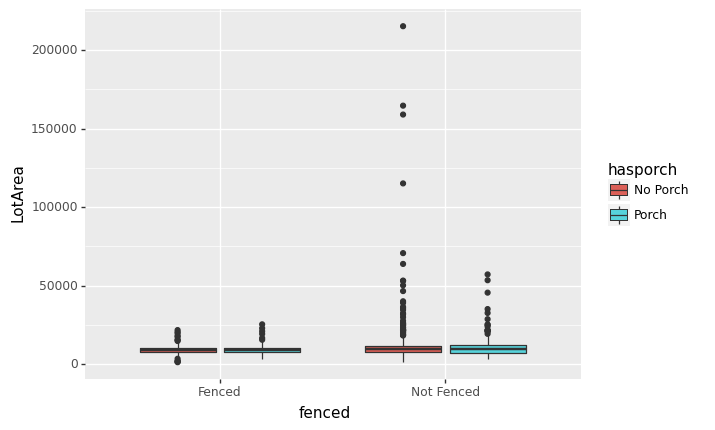

<ggplot: (8788156485505)>

In [70]:
ggplot(train, aes(x = 'fenced', y = 'LotArea', fill = 'hasporch')) + geom_boxplot() 

It's hard to see the real differences because of the outliers. We can limit the y-axis to exclude those to see if we can get a clearer picture.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


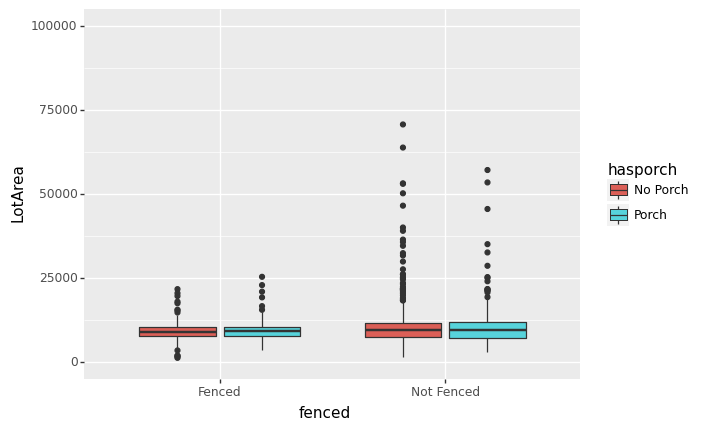

<ggplot: (8788155871309)>

In [71]:
#repeat last plot bu limiting lot area to 100,000
ggplot(train, aes(x = 'fenced', y = 'LotArea', fill = 'hasporch')) + geom_boxplot() +scale_y_continuous(limits=(0,100000))

Lot Area seems to be distributed similarly across all combinations. The larger groups have more variation and the fenced in yard with no porch has some low values. It is still starting to appear that it could be okay to treat all the houses as one group without separation. We can do a little more exploratory analysis on some other features to see.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


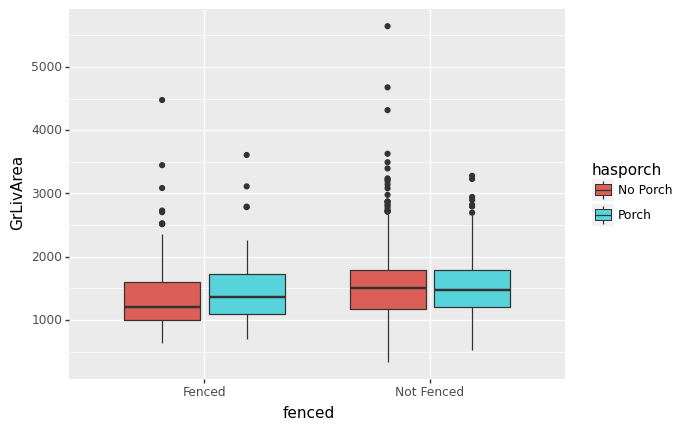

<ggplot: (8788155818153)>

In [72]:
ggplot(train, aes(x = 'fenced', y = 'GrLivArea', fill = 'hasporch')) + geom_boxplot() 

Again there doesn't seem to be anything indicating that either having a fence or having a porch is really related to the feature. We really can start to see that splitting into fenced/not fenced or having a porch or not doesn't appear to be worthwhile. We can double check later to see if any model fails a certain way more for these categories.

Now we can start trying to model. We will replace any missing values with the median value.

We also will need to look at columns with objects as value as categorical values. If they don't appear to be critical or if the groups mostly don't have sizes worth examining separately we will just drop those columns before trying to model.

In [73]:
defaults_median = train.median()
defaults_median

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
TotalPorch  

In [74]:
X_tr = train.fillna(defaults_median)
X_te = test.fillna(defaults_median)

In [75]:
X_train=X_tr.drop(columns=['fenced','hasporch','SalePrice'])
Y_train=X_tr.SalePrice

In [76]:
X_train.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

There is an object column 'SaleCondition' that has the vast majority as Normal and a few others, some of which are very small. It might be worth investigating if these categories are useful or if we can drop them.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


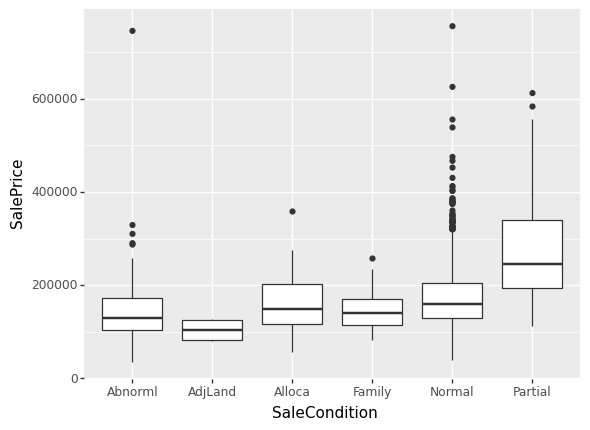

<ggplot: (8788156251085)>

In [77]:
ggplot(train, aes(x = 'SaleCondition', y = 'SalePrice')) + geom_boxplot() 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


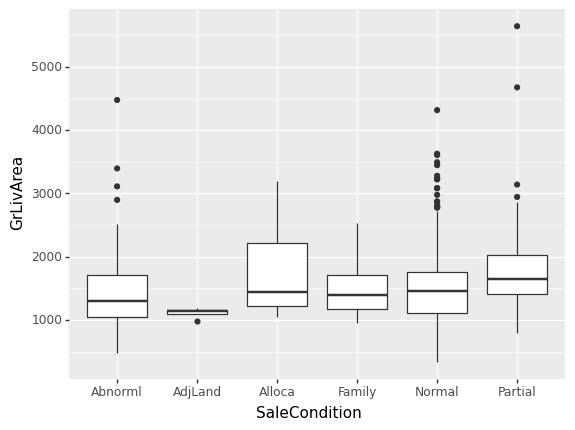

<ggplot: (8788144861661)>

In [78]:
ggplot(train, aes(x = 'SaleCondition', y = 'GrLivArea')) + geom_boxplot() 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


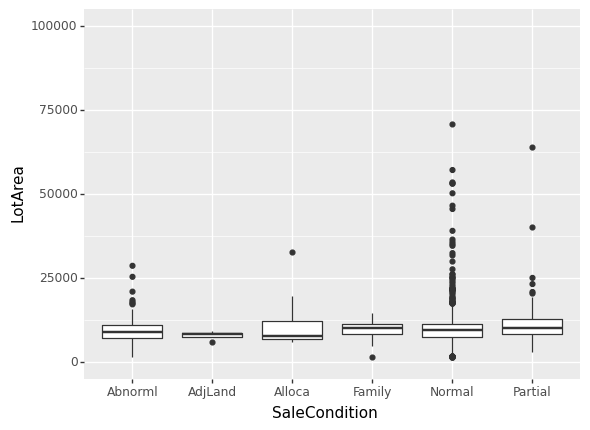

<ggplot: (8788156238525)>

In [79]:
ggplot(train, aes(x = 'SaleCondition', y = 'LotArea')) + geom_boxplot()+scale_y_continuous(limits=(0,100000))

The biggest categories other than normal were Abnormal and Partial. Abnormal does not show significant difference from Normal. Partial had higher sale prices but also somewhat higher lot area and living area. At least for now for a multivariate linear regression we will ignore this category.

In [80]:
X_train =X_train.fillna(defaults_median)

In [81]:
X_train=X_train.drop(columns='SaleCondition')

In [82]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [83]:
X_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [84]:
#Since only 6 homes have Gravel it's not worth worrying about this as a category so we drop this column
X_train=X_train.drop(columns='Street')

In [85]:
X_train.dtypes

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
                ...   
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType        object
TotalPorch       int64
Length: 79, dtype: object

In [86]:
X_train.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [87]:
X_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


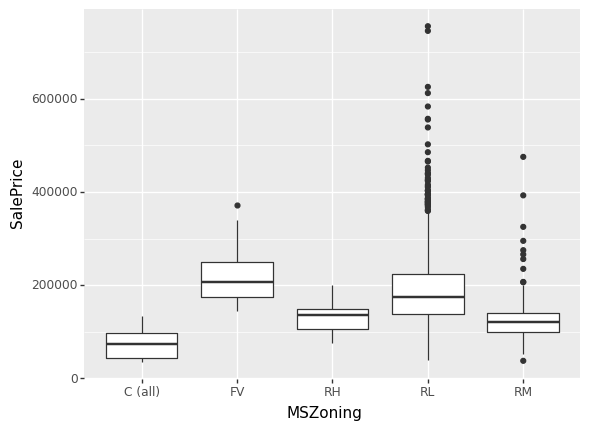

<ggplot: (8788156208833)>

In [88]:
ggplot(train, aes(x = 'MSZoning', y = 'SalePrice')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


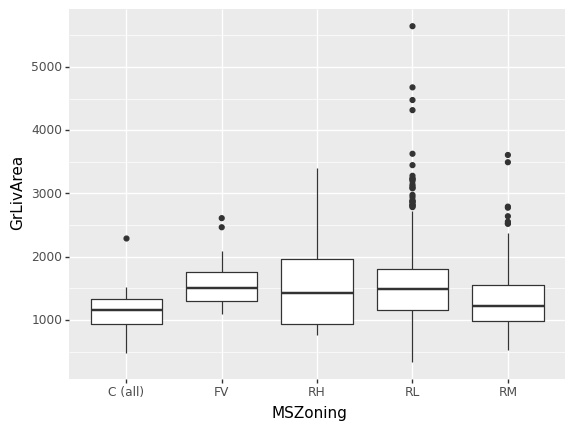

<ggplot: (8788156531925)>

In [89]:
ggplot(train, aes(x = 'MSZoning', y = 'GrLivArea')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


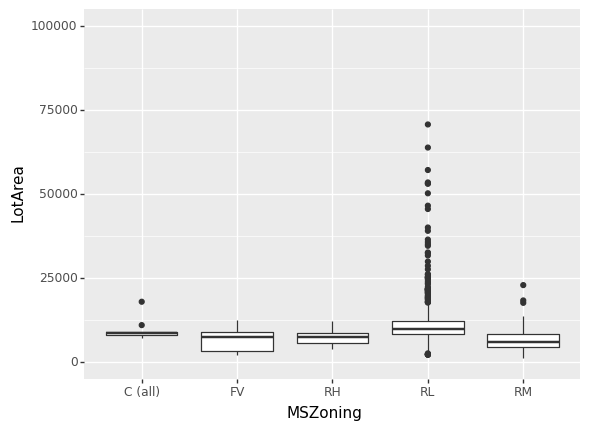

<ggplot: (8788155919113)>

In [90]:
ggplot(train, aes(x = 'MSZoning', y = 'LotArea')) + geom_boxplot()+scale_y_continuous(limits=(0,100000))

The vast majority of the MSZoning values are 'RL' with only 'RM' having significant numbers. While sale prices were lower for 'RM' so were a couple of other key values. This suggests that for now we can drop this categorical value

In [91]:
X_train=X_train.drop(columns='MSZoning')

In [92]:
X_train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [93]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
Alley           object
                ...   
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType        object
TotalPorch       int64
Length: 78, dtype: object

In [94]:
X_train.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

With an overwhelming number of entries being in one category here, it doesn't feel like we can separate based on these so we will drop this column as well

In [95]:
X_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

The Alley column has very few meaningful entries so we will drop it here

In [96]:
X_train=X_train.drop(columns=['SaleType','Alley'])

In [97]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
LotShape        object
                ...   
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 76, dtype: object

In [98]:
X_train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


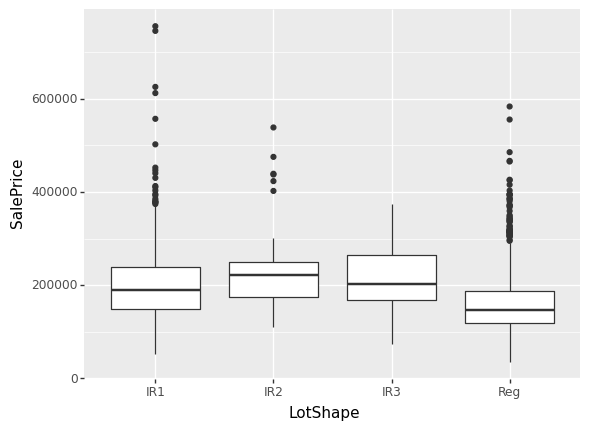

<ggplot: (8788144745125)>

In [99]:
#There are a significant number of non regular lot shapes. We can try to see if the sale price varies much
ggplot(train, aes(x = 'LotShape', y = 'SalePrice')) + geom_boxplot()


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


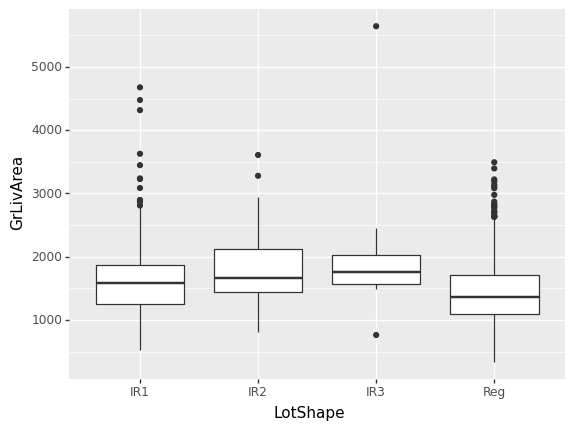

<ggplot: (8788144863629)>

In [100]:
ggplot(train, aes(x = 'LotShape', y = 'GrLivArea')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


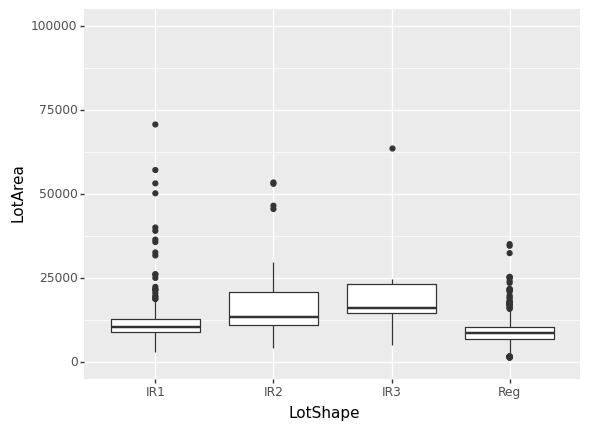

<ggplot: (8788156310613)>

In [101]:
ggplot(train, aes(x = 'LotShape', y = 'LotArea')) + geom_boxplot()+scale_y_continuous(limits=(0,100000))

Lot shape doesn't appear to affect price directly so we will drop this categorical column for now

In [102]:
X_train=X_train.drop(columns='LotShape')

In [103]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [104]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
LandContour     object
                ...   
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 75, dtype: object

In [105]:
X_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [106]:
#There aren't enough non level contours to treat them separately so we will drop this
X_train=X_train.drop(columns='LandContour')

In [107]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
Utilities       object
                ...   
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 74, dtype: object

In [108]:
X_train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [109]:
#With only one outlying value this column can be dropped
X_train=X_train.drop(columns='Utilities')

In [110]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
LotConfig       object
                ...   
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 73, dtype: object

In [111]:
X_train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


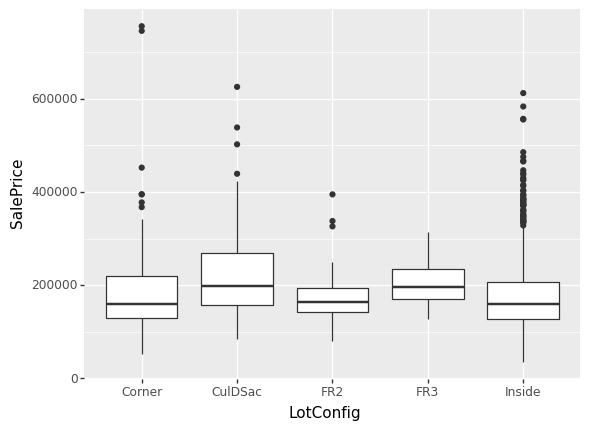

<ggplot: (8788156798997)>

In [112]:
ggplot(train, aes(x = 'LotConfig',y = 'SalePrice')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


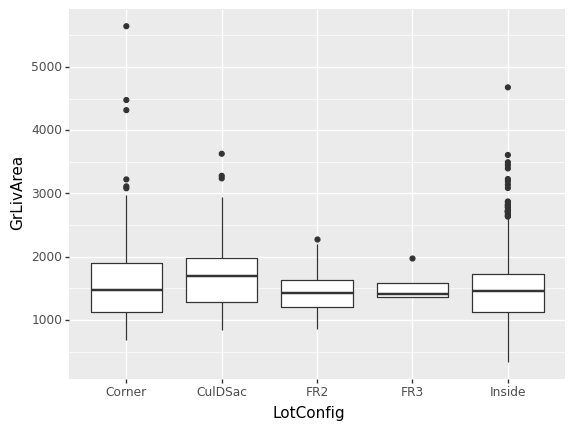

<ggplot: (8788155929953)>

In [113]:
ggplot(train, aes(x = 'LotConfig', y = 'GrLivArea')) + geom_boxplot()

In [114]:
#It seems we can drop the Lot Config for now as well
X_train=X_train.drop(columns='LotConfig')

In [115]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
LandSlope       object
                ...   
MiscFeature     object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 72, dtype: object

In [116]:
X_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [117]:
#With no significant groups of homes in the categories other than gentle we drop this category
X_train=X_train.drop(columns='LandSlope')

In [118]:
X_train.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [119]:
#With only a small number miscellaneous features available we can drop this as well
X_train=X_train.drop(columns='MiscFeature')

In [120]:
X_train.dtypes

Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
Neighborhood     object
                 ...   
Fence            object
MiscVal           int64
MoSold            int64
YrSold            int64
TotalPorch        int64
Length: 70, dtype: object

In [121]:
X_train.Fence.value_counts()

0        1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [122]:
X_train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [123]:
#We can drop the Fence variable
X_train=X_train.drop(columns='Fence')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


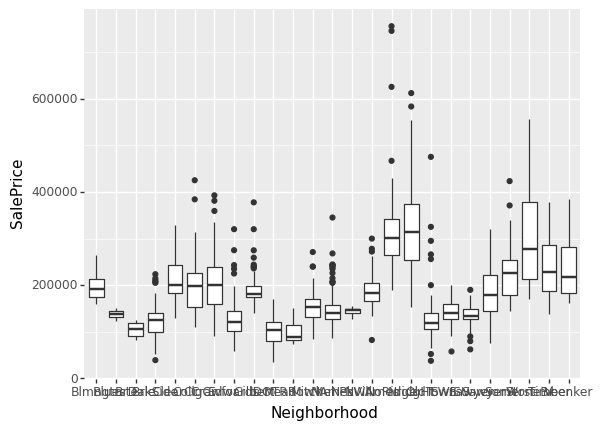

<ggplot: (8788156682833)>

In [124]:
ggplot(train, aes(x = 'Neighborhood', y = 'SalePrice')) + geom_boxplot()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


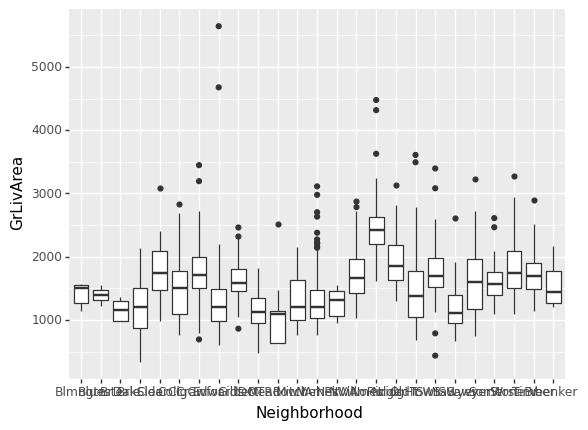

<ggplot: (8788155790933)>

In [125]:
ggplot(train, aes(x = 'Neighborhood', y = 'GrLivArea')) + geom_boxplot()

Various neigborhoods do seem to have variations in price but the categories are small and perhaps these can be accounted for from other numeric factors. We can look at some scatterplots to see if there are trends

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


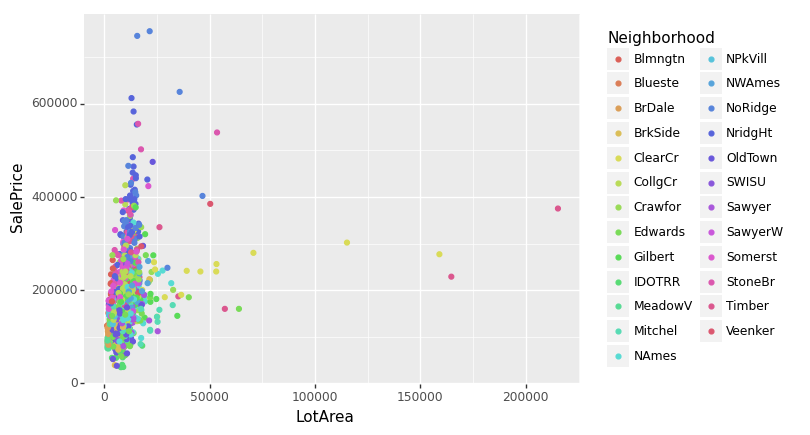

<ggplot: (8788156153965)>

In [126]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='Neighborhood')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


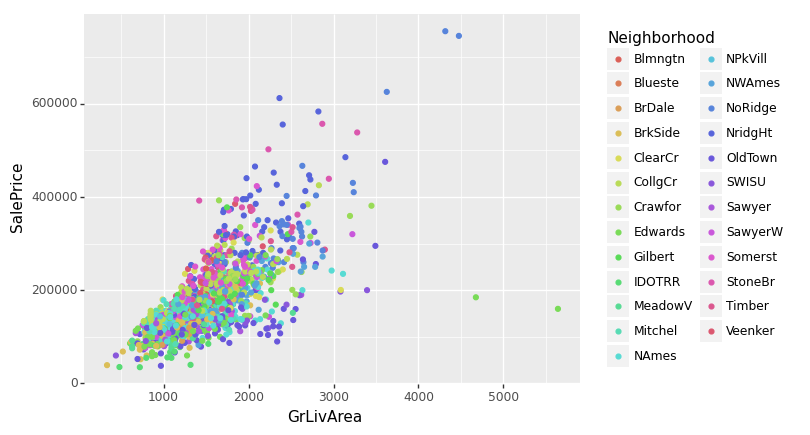

<ggplot: (8788156678361)>

In [127]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='Neighborhood')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


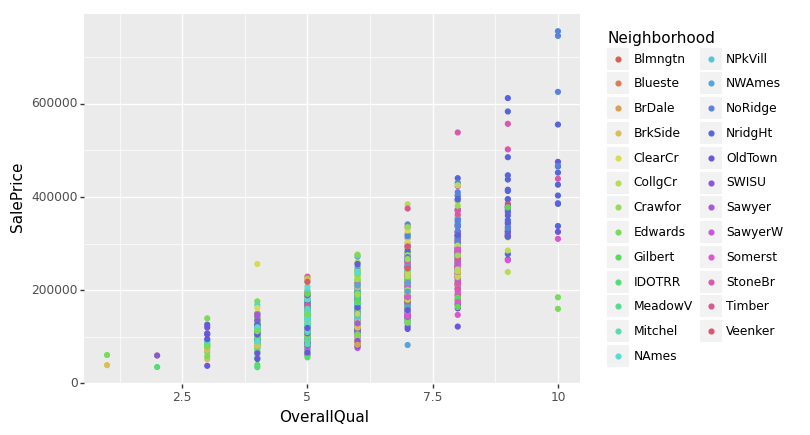

<ggplot: (8788156350873)>

In [128]:
ggplot(train, aes(x = 'OverallQual', y ='SalePrice',color='Neighborhood')) + geom_point()

In [129]:
#For now we drop the neighborhood
X_train=X_train.drop(columns="Neighborhood")

In [130]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
Condition1      object
                ...   
PoolQC          object
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 68, dtype: object

In [131]:
X_train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

With the vast majority of conditions being 'Norm' we drop that column

In [132]:
#Dropping condition
X_train=X_train.drop(columns="Condition1")

In [133]:
#As noted previously we will drop the pool
X_train=X_train.drop(columns="PoolQC")

In [134]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
Condition2      object
                ...   
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 66, dtype: object

In [135]:
X_train.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [136]:
#With all but a few being "Norm" we can drop this as well
X_train=X_train.drop(columns="Condition2")

In [137]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
BldgType        object
                ...   
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 65, dtype: object

In [138]:
X_train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [139]:
#We will drop the building type categorical value. The number of non single family homes will be too small to analyze separately 
X_train=X_train.drop(columns="BldgType")

In [140]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
HouseStyle      object
                ...   
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 64, dtype: object

In [141]:
X_train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


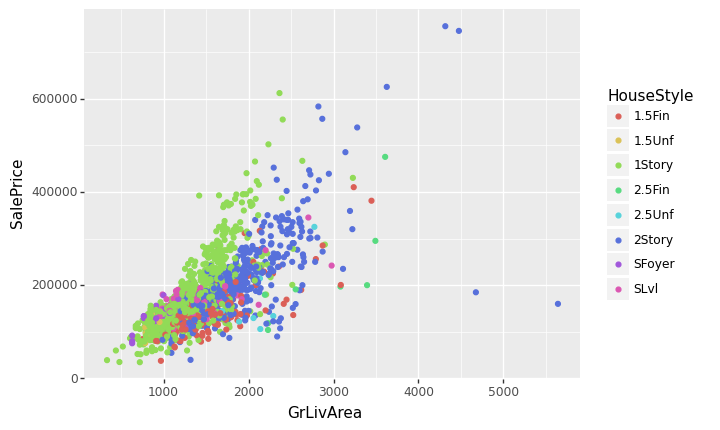

<ggplot: (8788144931409)>

In [142]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='HouseStyle')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


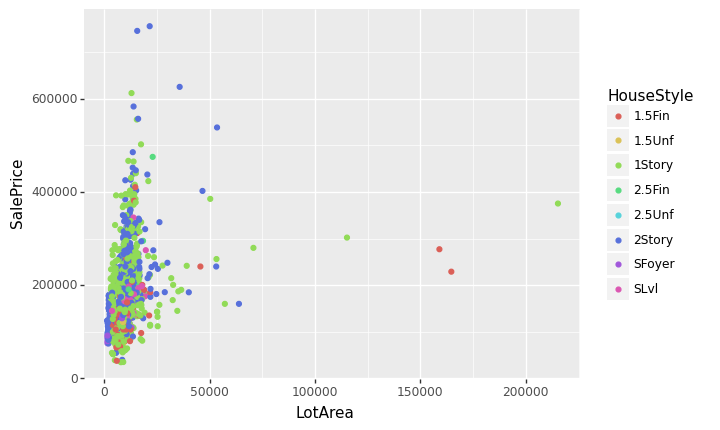

<ggplot: (8788156429417)>

In [143]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='HouseStyle')) + geom_point()

There doesn't seem to be justification in separating house styles here. Perhaps in other models we might need to consider them

In [144]:
X_train=X_train.drop(columns="HouseStyle")

In [145]:
X_train.dtypes

Id               int64
MSSubClass       int64
LotFrontage    float64
LotArea          int64
OverallQual      int64
                ...   
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
TotalPorch       int64
Length: 63, dtype: object

In [146]:
object_columns = X_train.select_dtypes(include=['object']).columns

In [147]:
print(object_columns)

Index(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'],
      dtype='object')


We will look at the rest of the categorical variables to see if any have potential value to split as separate groups. If a category has only one dominant type we will not split by it because it we won't have enough data in the smaller types to use. If there are several large groups we will look to see if a couple of scatterplots of sale price versus Living area or lot area show obvious differences. If not we will drop them for now.

In [148]:
X_train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [149]:
X_train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [150]:
X_train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

Exterior types have several groups, so it is worth looking to see if different patterns seem to emerge


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


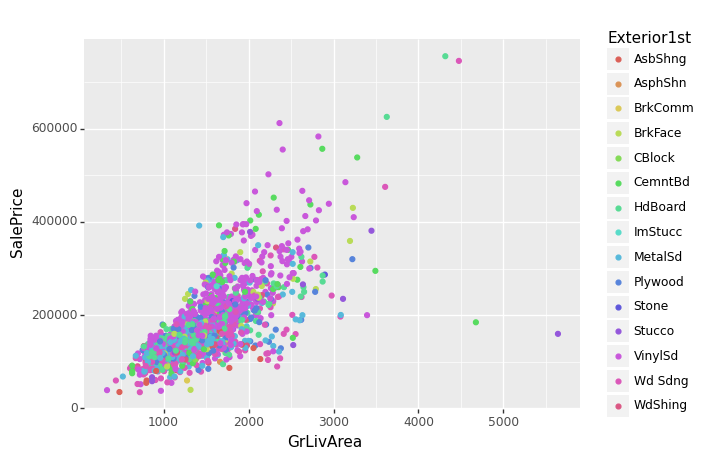

<ggplot: (8788156690429)>

In [151]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='Exterior1st')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


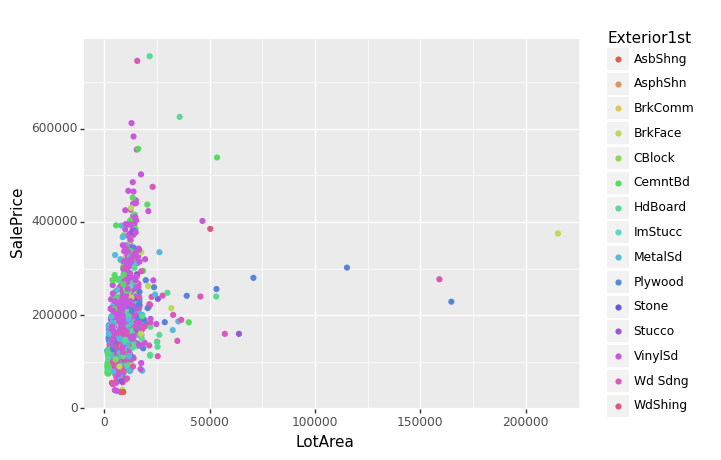

<ggplot: (8788156473057)>

In [152]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='Exterior1st')) + geom_point()

In [153]:
X_train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


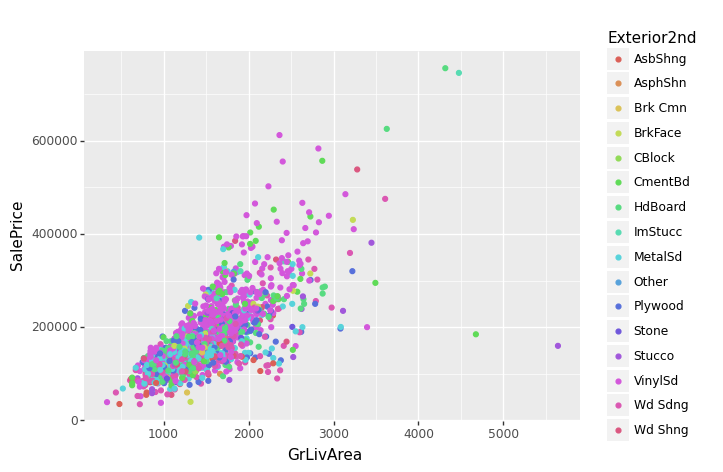

<ggplot: (8788144898721)>

In [226]:
ggplot(train,aes(x='GrLivArea',y='SalePrice',color='Exterior2nd'))+geom_point()

In [227]:
#There isn't any apparent separation so we can drop these two categories
X_train=X_train.drop(columns=["Exterior1st","Exterior2nd"])

In [154]:
X_train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


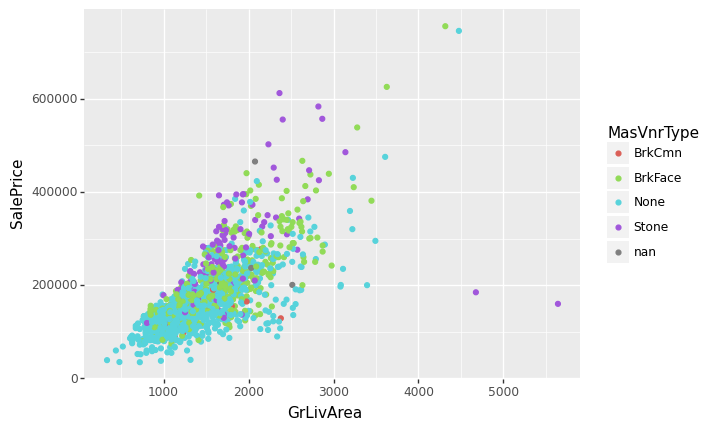

<ggplot: (8788156387941)>

In [155]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='MasVnrType')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


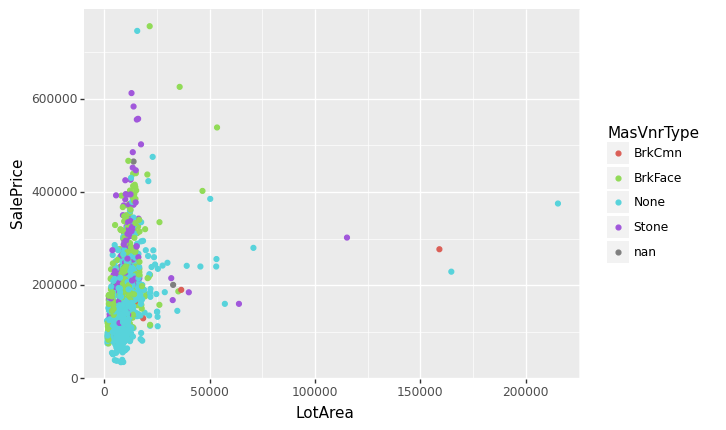

<ggplot: (8788156002709)>

In [156]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='MasVnrType')) + geom_point()

In [225]:
#We can drop this category. The scatterplots don't indicate enough separation to try to split somehow
X_train=X_train.drop(columns="MasVnrType")

In [157]:
X_train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


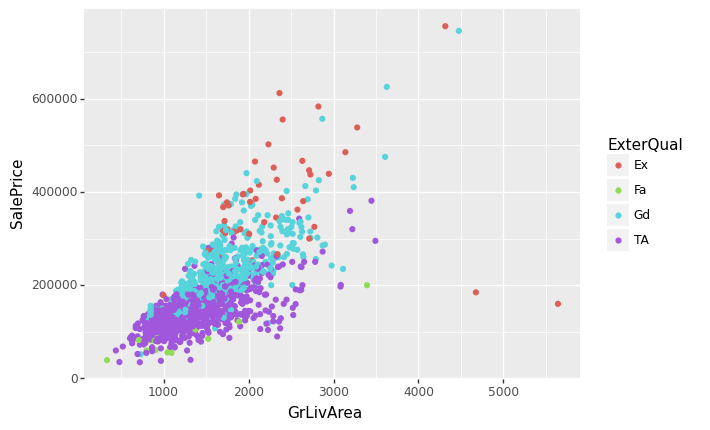

<ggplot: (8788156350337)>

In [158]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='ExterQual')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


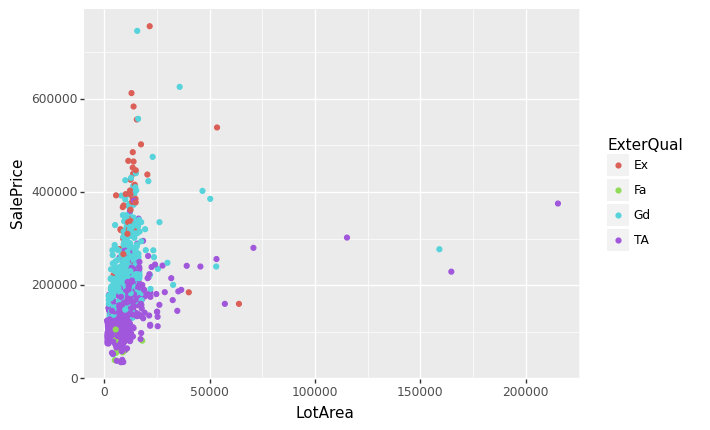

<ggplot: (8788156350433)>

In [159]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='ExterQual')) + geom_point()

We can see here that there seems to be a difference. While Gd and TA make up the vast majority, we can possibly group the Ex with Gd and Fa with TA. It appears it's worth splitting into those as two groups and creating models for each group. 

In [160]:
obj_columns=list(object_columns)

In [161]:
X_train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [162]:
#There aren't enough values outside of "TA" to use
X_train=X_train.drop(columns="ExterCond")

In [163]:
X_train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


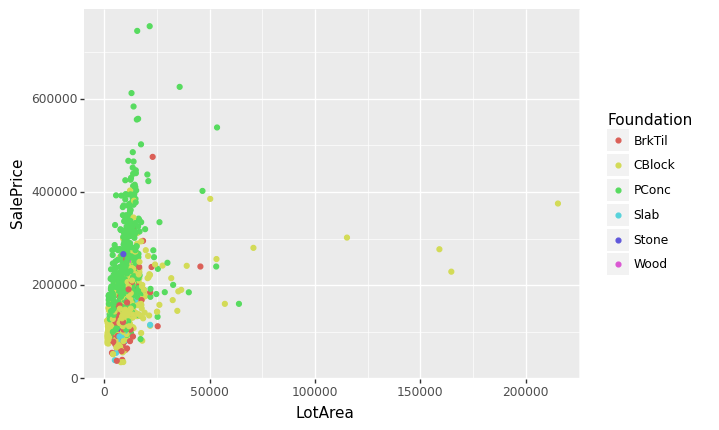

<ggplot: (8788144751937)>

In [164]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='Foundation')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


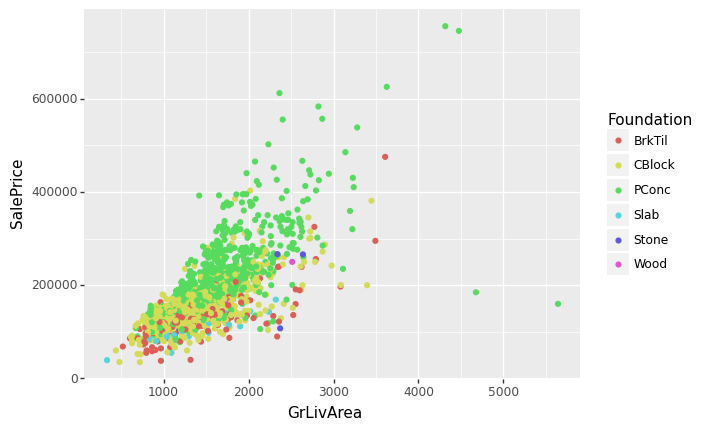

<ggplot: (8788155998293)>

In [165]:
ggplot(train, aes(x ='GrLivArea', y = 'SalePrice',color='Foundation')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


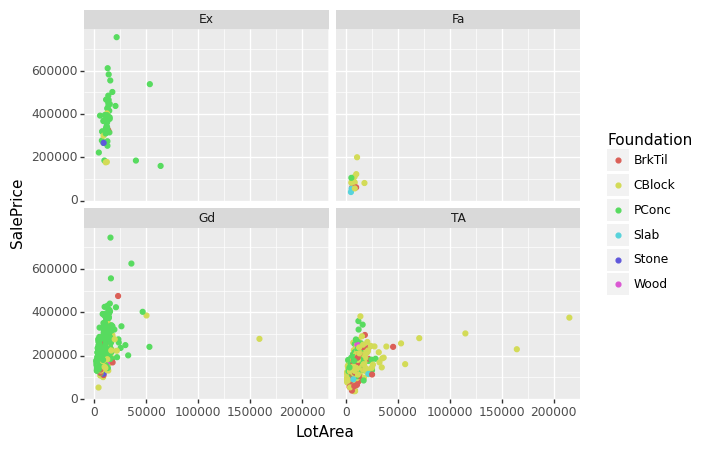

<ggplot: (8788155990705)>

In [166]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='Foundation')) + geom_point()+facet_wrap('ExterQual')

In [167]:
#There seems to be a relationship between Exterior Quality and Foundation. We can try to see
X_train[X_train.ExterQual=="Gd"].Foundation.value_counts()

PConc     417
CBlock     57
BrkTil     10
Stone       2
Slab        1
Wood        1
Name: Foundation, dtype: int64

In [168]:
X_train[X_train.ExterQual=="TA"].Foundation.value_counts()

CBlock    564
PConc     183
BrkTil    133
Slab       21
Stone       3
Wood        2
Name: Foundation, dtype: int64

In [169]:
X_train[X_train.ExterQual=="Ex"].Foundation.value_counts()

PConc     46
CBlock     4
Stone      1
BrkTil     1
Name: Foundation, dtype: int64

In [170]:
X_train[X_train.ExterQual=='Fa'].Foundation.value_counts()

CBlock    9
Slab      2
BrkTil    2
PConc     1
Name: Foundation, dtype: int64

Both Foundation type and Exterior Quality seem to have an impact on the slopes. However they seem to be intertwined as most of the better quality ("Gd" and "Ex") tend to have poured concrete while the "TA" and "Fa" ones tend to have cinder block as the most common. Splitting based on multiple categories is not desirable. For now we will drop the foundation one. When models other than multilinear regression appear we may integrate one or both of these into the models.

In [171]:
X_train=X_train.drop(columns="Foundation")

In [172]:
X_train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


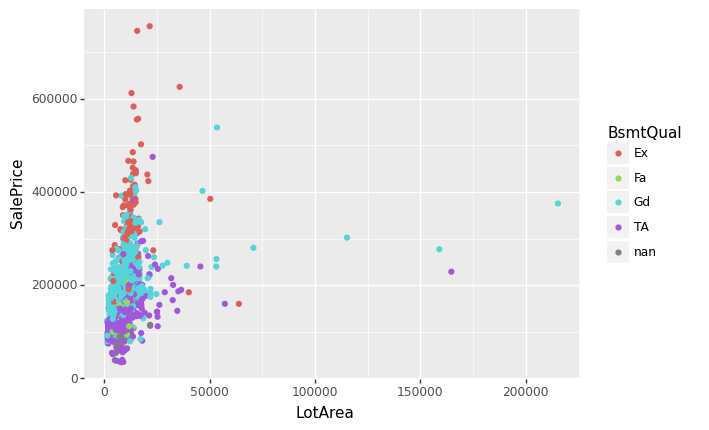

<ggplot: (8788144715885)>

In [173]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='BsmtQual')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


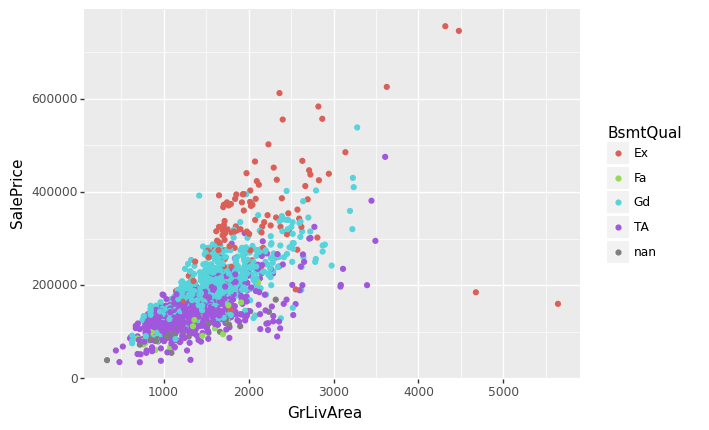

<ggplot: (8788155912945)>

In [174]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='BsmtQual')) + geom_point()

We see a similar behavior here. We now will investigate if this can be tied to Exterior Quality

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


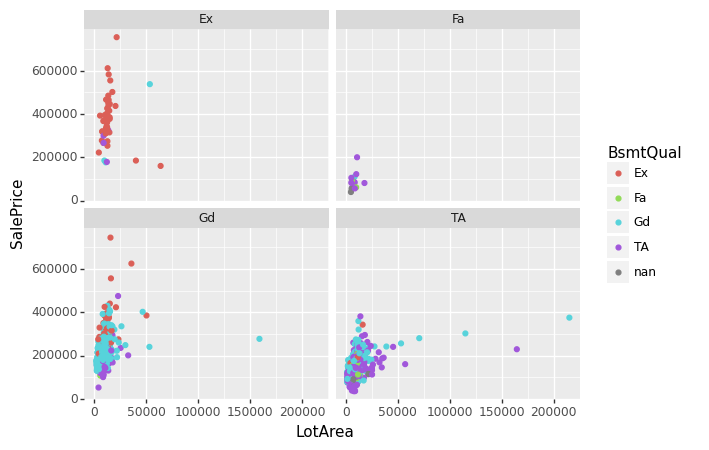

<ggplot: (8788155923693)>

In [175]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='BsmtQual')) + geom_point()+facet_wrap('ExterQual')

We can see a similar relationship as before. Basement Quality seems to be closely related to Exterior Quality and for now we drop it

In [176]:
X_train=X_train.drop(columns="BsmtQual")

In [177]:
X_train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [178]:
#Not enough values other than TA to use, so we drop it
X_train=X_train.drop(columns="BsmtCond")

In [179]:
X_train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


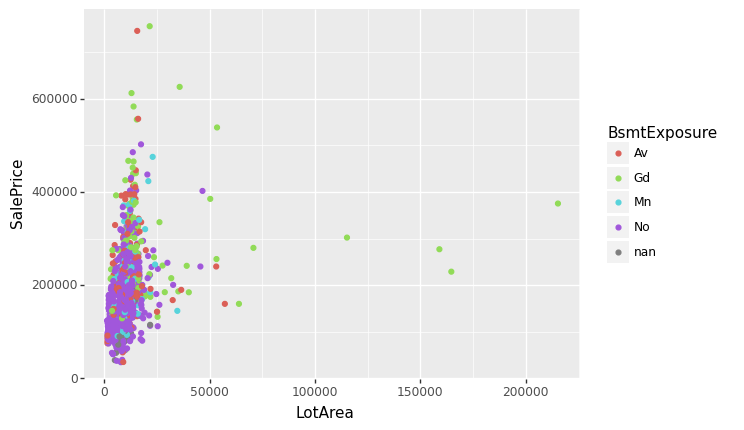

<ggplot: (8788155883049)>

In [180]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='BsmtExposure')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


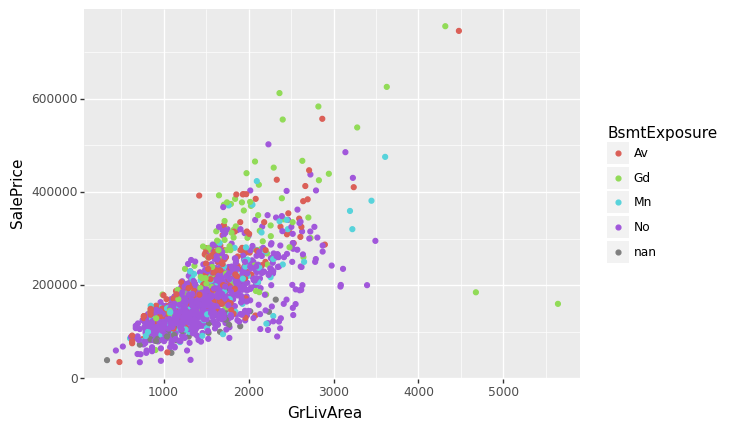

<ggplot: (8788156530329)>

In [181]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='BsmtExposure')) + geom_point()

In [182]:
#no noticeable pattern for this category exists so we drop it
X_train=X_train.drop(columns="BsmtExposure")

In [183]:
X_train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


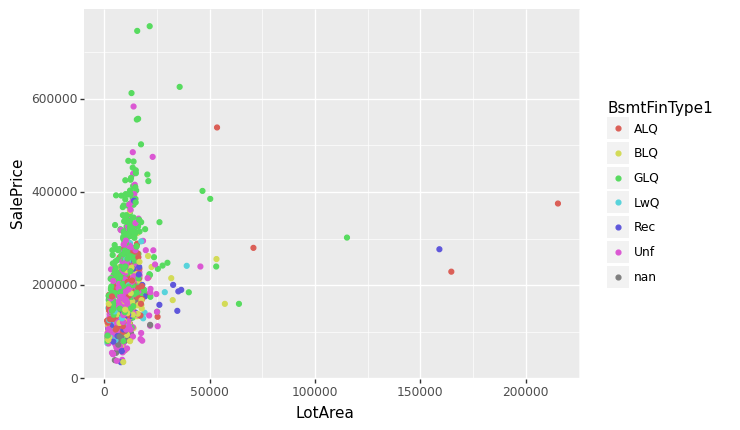

<ggplot: (8788156386705)>

In [184]:
ggplot(train, aes(x = 'LotArea', y = 'SalePrice',color='BsmtFinType1')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


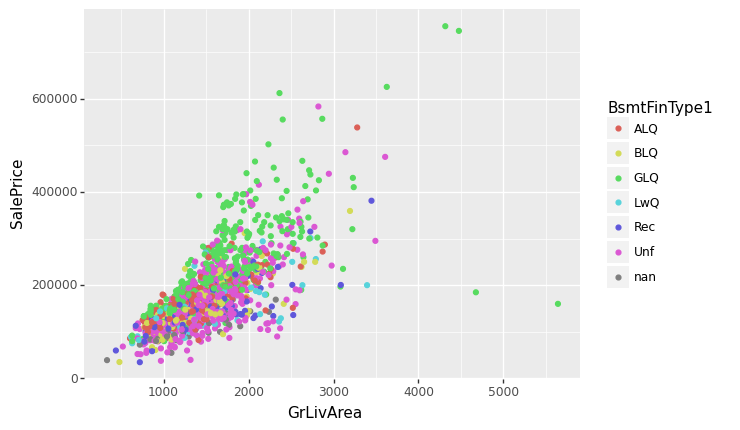

<ggplot: (8788155883253)>

In [185]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='BsmtFinType1')) + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


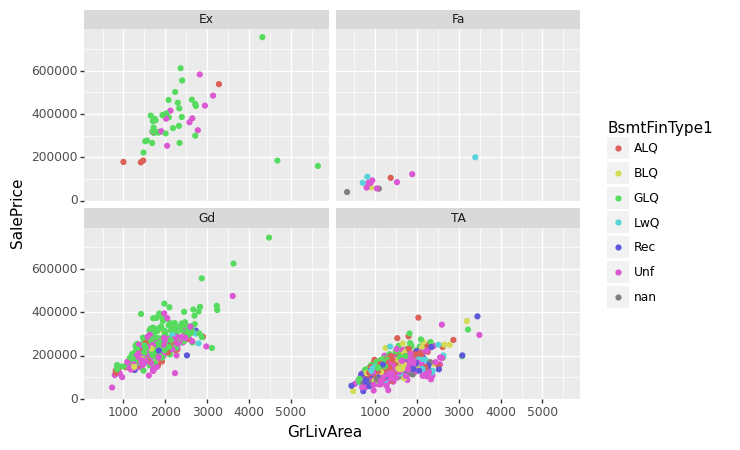

<ggplot: (8788156159665)>

In [186]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='BsmtFinType1')) + geom_point()+facet_wrap("ExterQual")

In [187]:
X_train[X_train.ExterQual=="Gd"].BsmtFinType1.value_counts()

GLQ    257
Unf    165
ALQ     34
BLQ     14
LwQ      9
Rec      8
Name: BsmtFinType1, dtype: int64

In [188]:
X_train[X_train.ExterQual=="TA"].BsmtFinType1.value_counts()

Unf    246
ALQ    181
BLQ    133
GLQ    125
Rec    125
LwQ     62
Name: BsmtFinType1, dtype: int64

There is some relation between the finish type and exterior quality, but its not as clear as previous ones. One possible solution is to map these to numeric values when attempting regression. We won't delete this column yet but will have to either delete or turn it into numeric data before starting a regression model

In [189]:
X_train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [190]:
#Finish Type 2 doesn't have enough variation to use do we will drop
X_train=X_train.drop(columns="BsmtFinType2")

In [191]:
X_train.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [192]:
#There is not enough variation to use this categorical value, so we drop it
X_train=X_train.drop(columns="Heating")

In [193]:
X_train.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


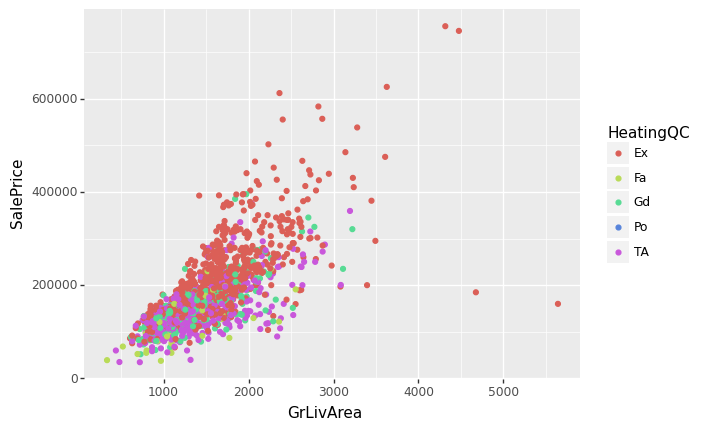

<ggplot: (8788156512081)>

In [194]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='HeatingQC'))+ geom_point()

There is a lot of overlap on the scatterplot between excellent and Typical/Average. Excellent did tend to score higher. We can drop this for now and potential come back and add it back with numeric values.

In [195]:
X_train=X_train.drop(columns='HeatingQC')

In [196]:
X_train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [197]:
#Central Air might be a factor in price but with the vast majority having it, we drop it
X_train=X_train.drop(columns="CentralAir")

In [198]:
X_train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [199]:
#The majority are circuit breaker so we drop this
X_train=X_train.drop(columns="Electrical")

In [200]:
X_train.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


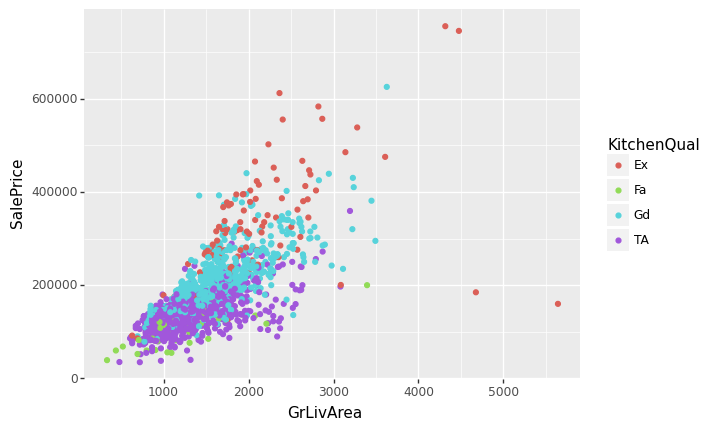

<ggplot: (8788156059121)>

In [201]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='KitchenQual'))+ geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


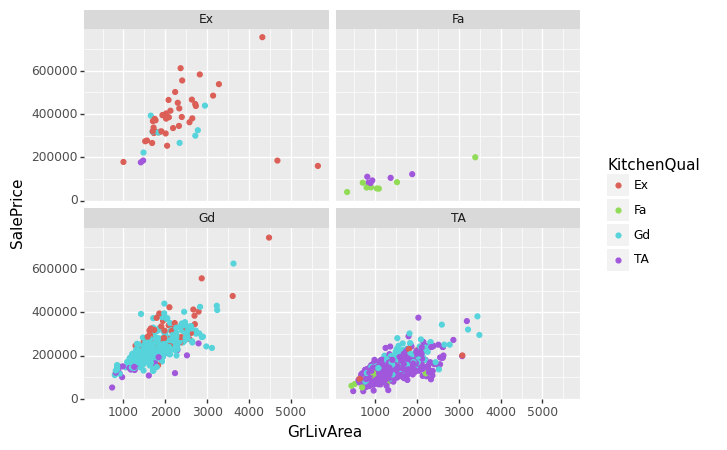

<ggplot: (8788156062761)>

In [202]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='KitchenQual'))+ geom_point()+facet_wrap("ExterQual")

There is a split based on kitchen quality but that split seems to be close to Ext. quality so we can drop kitchen quality for now

In [224]:
X_train=X_train.drop(columns='KitchenQual')

In [203]:
X_train.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [207]:
#This is another categorical value with the vast majority having one value so we drop it
X_train=X_train.drop(columns="Functional")

In [204]:
X_train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [208]:
#There aren't enough data points here with fireplaces to split so we for now drop this
X_train=X_train.drop(columns="FireplaceQu")

In [205]:
X_train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


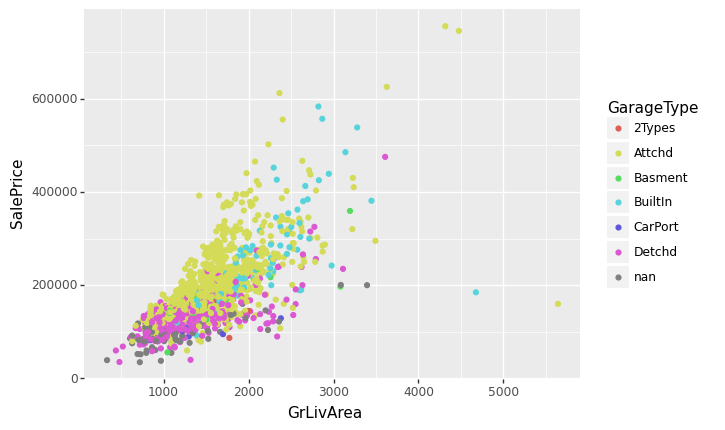

<ggplot: (8788156711205)>

In [206]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='GarageType'))+ geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


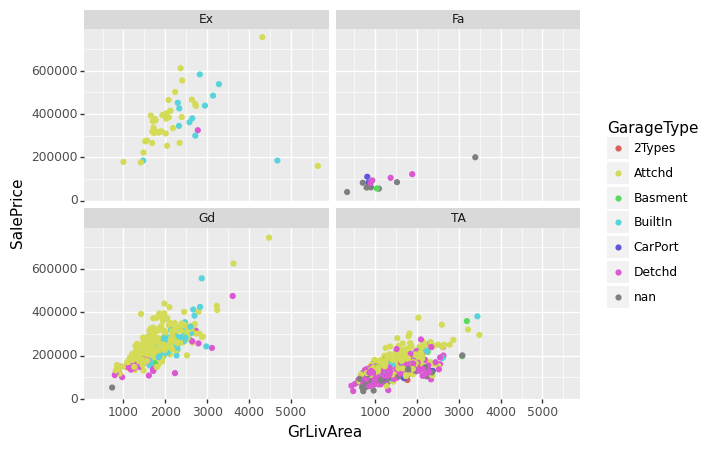

<ggplot: (8788155459453)>

In [210]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='GarageType'))+ geom_point()+facet_wrap("ExterQual")

In [211]:
#It doesn't appear that we need the garage type to get anything useful so for now we drop it
X_train=X_train.drop(columns="GarageType")

In [212]:
X_train.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


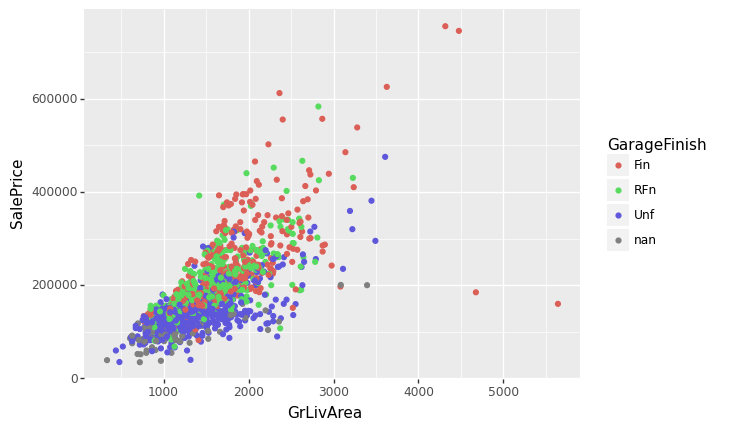

<ggplot: (8788156647413)>

In [213]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='GarageFinish'))+ geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


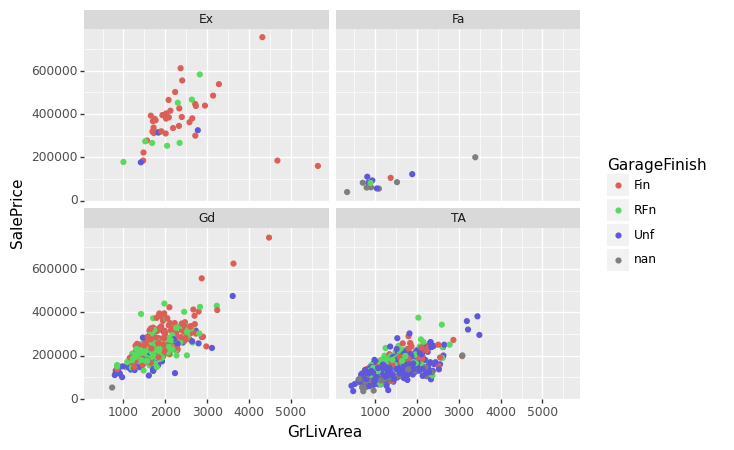

<ggplot: (8788156726029)>

In [215]:
ggplot(train, aes(x = 'GrLivArea', y = 'SalePrice',color='GarageFinish'))+ geom_point()+facet_wrap("ExterQual")

In [216]:
#Again this seems to be a similar split like we had for ExterQual so we drop it
X_train=X_train.drop(columns="GarageFinish")

In [217]:
X_train.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [218]:
#Since the vast majority are TA we drop this column
X_train=X_train.drop(columns="GarageQual")

In [219]:
X_train.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [220]:
#As previously we have a large majority with one value so we drop this column
X_train=X_train.drop(columns="GarageCond")

In [221]:
X_train.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [222]:
#With the vast majority being Y we drop this as well
X_train=X_train.drop(columns="PavedDrive")

In [228]:
X_train.select_dtypes(include=['object']).columns

Index(['RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtFinType1'], dtype='object')

In [229]:
X_train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [230]:
X_train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [231]:
#Neither of the roof categories have a good way to split so we drop them
X_train=X_train.drop(columns=["RoofStyle","RoofMatl"])

In [232]:
X_train.select_dtypes(include=['object']).columns

Index(['ExterQual', 'BsmtFinType1'], dtype='object')

We now will drop the BsmtFinType1 category. However we note that it might be relevant so after we drop it and create a model we will want to look to see if it has noticeable trends of over or underpricing based on this category

In [233]:
X_train=X_train.drop(columns="BsmtFinType1")

We now only have the ExterQual which we will use to split into two separate groups to create a model for each

In [241]:
X_train1=X_train[(X_train.ExterQual=="TA") | (X_train.ExterQual=="Fa")]
X_train2=X_train[(X_train.ExterQual=="Gd") | (X_train.ExterQual=="Ex")]

In [242]:
X_train1.ExterQual.value_counts()

TA    906
Fa     14
Name: ExterQual, dtype: int64

In [243]:
X_train2.ExterQual.value_counts()

Gd    488
Ex     52
Name: ExterQual, dtype: int64

We have successfully split based on this category. We can drop it from each so we only have numeric data available

In [244]:
X_train1=X_train1.drop(columns="ExterQual")
X_train2=X_train2.drop(columns="ExterQual")

In [245]:
X_train1.select_dtypes(include='object').columns

Index([], dtype='object')

In [246]:
X_train2.select_dtypes(include='object').columns

Index([], dtype='object')

We have successfully split into two groups and each group has only numeric columns. We can now begin the process of trying to create a multilinear regression model.